# Latar Belakang Masalah

Transjakarta merupakan sebuah layanan transportasi tersistem yang disediakan untuk memecah masalah kemacetan di DKI Jakarta. Pihak Transjakarta merekrut seorang Data Scienctist, dimana Transjakarta ingin mengetahui apakah layanan yang diberikan sudah tepat sasaran dan menjadi solusi untuk mengurangi jumlah kemacetan di DKI Jakarta. Dari sudut pandang pengguna Transjakarta isu seperti durasi, keamanan dan kenyaman perjalanan akan menjadi pertimbangan untuk menggunakan layanan.

## Pernyataan masalah

Transjakarta ingin mengetahui apakah layanan mereka sudah tepat sasaran sebagai layanan untuk mengurai kemacetan di DKI Jakarta dan poin peningkatan apa yang bisa dilakukan pada layanan mereka.
Sebagai data analyst, kita akan menjawab pertanyaan berikut:
- Bagian mana yang bisa ditingkatkan oleh pihak Transjakarta untuk meningkatkan pelayanan mereka?

## Tujuan Analisa

Dengan dilakukannya analisa ini, memungkinkan pihak Transjakarta untuk meningkatkan layanan mereka. Sehingga dengan pelayanan yang lebih baik akan menciptakan image baik kepada masyarakat dan meningkatkan jumlah pengguna layanan. Dengan demikian, tujuan awal diadakannya layanan Transjakarta untuk mengurangi kemacetan akan semakin baik.

## Stakeholder: 
Stakeholder penerima analisis ini adalah:
* Transjakarta
    - Pihak transjakarta bisa menggunakan hasil analisa ini untuk melakukan evaluasi dan pengembangan pada layanan yang diberikan.
* Dinas Perhubungan
    - perencanaan, pelaksanaan, pembinaan, pengendalian, evaluasi, dan pelaporan terkait lalu lintas, terutama terkait pengurangan titik kemacetan
* Perusahaan
    - Perusahaan yang terletak pada daerah rawan macet dapat menggunakan data ini, menjadi poin rekomendasi transportasi karyawan agar mengurangi keterlambatan karyawan


# Data

> Disclaimer : beberapa bagian dari syntax menggunakan head(3) untuk mempermudah scrolling bagian syntax lainnya agar tidak terlalu panjang, jika ingin mengetahui lebih lanjut pada bagian syntax tertentu. Silahkan mengatur kembali head(3) menjadi sesuai keinginanmu atau bisa menghapusnya.

> Import Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatche
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kstest, ttest_1samp, ttest_rel,kruskal

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

> Import Data

In [64]:
datapath = '/Purwadika Job Connection Data Science/Yosua Notes/Capstone 2/'

In [65]:
tjDataset = pd.read_csv(datapath + 'Transjakarta.csv')

In [66]:
tjDataset.head(3)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0


## Data Understanding and Cleaning

In [67]:
tjDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

> Berdasarkan syntax diatas, ditemukan missing data pada coloumn sebagai berikut:
* CorridorID
* CorridorName
* tapInStops
* tapOutStops
* tapOutStopsName
* tapOutStopsLat
* tapOutStopsLon
* stopEndSeq
* tapOutTime
* payAmount

In [68]:
display(tjDataset.describe(), tjDataset.describe(include= 'object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,FMZZ963S4B68ZP,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-24 06:53:50
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [69]:
# Langkah 1: Mencari nama yang memiliki kartu > 1
jumlah_kartu_per_nama = tjDataset.groupby('payCardName')['payCardID'].nunique()
list_nama_multi_kartu = jumlah_kartu_per_nama[jumlah_kartu_per_nama > 1].index

# Langkah 2: Memfilter dataset dengan list nama yang memiliki kartu > 1
data_multi_kartu = tjDataset[tjDataset['payCardName'].isin(list_nama_multi_kartu)]

# Langkah 3: Menampilkan hasil filter yang sudah dibersihkan
hasil_rinci = data_multi_kartu[['payCardName', 'payCardID']].drop_duplicates().sort_values('payCardName')

print("User dengan payCardName sama dan payCardID berbeda:")
print(hasil_rinci)

User dengan payCardName sama dan payCardID berbeda:
              payCardName         payCardID
32668         Ade Halimah  6589152382354731
34820         Ade Halimah  6011718928121822
12119     Cengkal Lestari     4992399872617
32658     Cengkal Lestari      676340574497
22     Fathonah Saefullah      676293109036
12496  Fathonah Saefullah  4949430360722628
12358         Leo Wastuti   180044335370375
37602         Leo Wastuti  4839065457731638
12461      Rahayu Prabowo  2402313549139274
32419      Rahayu Prabowo   343897458234312
232       Suci Hutagalung  6011206561670347
32244     Suci Hutagalung  2267480345217374
69            Suci Wacana  5134532253940704
12024         Suci Wacana  4726207758980912


Informasi yang bisa diambil dari dataset berikut:
* Pada dataset ini berisi 37900 dengan 22 fitur
* 'transID' merujuk pada jumlah transaksi yang terjadi dalam dataset, dimana dari keseluruhan data terdapat 1993 pengguna transjakarta diwakili dari 'payCardID' dengan menggunakan 6 penyedia kartu diwakili dari 'payCardBank'
* dari 2000 user dalam 'payCardID' ternyata diketahui adanya 7 user dengan 'payCardName' yang sama
* Jumlah koridor yang tersedia pada layanan Transjakarta adalah 221 koridor. Informasi ini diambil dari jumlah uniq corridorID

## Type Data Fixing

> Menyesuaikan tipe data
* payCardID int -> str
* stopStartSeq int -> str
* stopEndSeq float -> str
---
* payCardBirthDate int -> date
* tapInTIme str -> date
* tapOutTime str -> date


In [70]:
# Konversi tipe data dengan looping

# 1. Kelompok output str

ubahString = ['payCardID', 'stopStartSeq', 'stopEndSeq']

for columns in ubahString:
    tjDataset[columns] = tjDataset[columns].astype(str)

# 2. Kelompok output date

ubahDate = ['payCardBirthDate', 'tapInTime', 'tapOutTime']

for columns in ubahDate:
    tjDataset[columns] = pd.to_datetime(tjDataset[columns])

# 3 Cek hasil Looping konversi tipe date

tjDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  object        
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  datetime64[ns]
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  float64       
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  object        
 14  tapInTime         3790

In [71]:
tjDataset.head(3)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,1970-01-01 00:00:00.000002008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1970-01-01 00:00:00.000001997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1970-01-01 00:00:00.000001992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0


## Develop New Feature

In [72]:
tjDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  object        
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  datetime64[ns]
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  float64       
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  object        
 14  tapInTime         3790

In [73]:

print("--- Memulai Proses Feature Engineering ---")

# ==============================================================================
# FITUR 1: TANGGAL (HARI DALAM BULAN)
# ==============================================================================
print("Langkah 1: Membuat fitur 'tanggal'...")
# .dt.day akan mengambil angka hari dari tanggal (misal: 1, 15, 31)
tjDataset['tanggal'] = tjDataset['tapInTime'].dt.day


# ==============================================================================
# FITUR 2: NAMA HARI
# ==============================================================================
print("Langkah 2: Membuat fitur 'nama_hari'...")
# Kita gunakan metode mapping yang andal untuk nama hari dalam Bahasa Indonesia
hari_map = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}
# .dt.dayofweek mengambil nomor hari (Senin=0, ..., Minggu=6)
tjDataset['nama_hari'] = tjDataset['tapInTime'].dt.dayofweek.map(hari_map)


# ==============================================================================
# FITUR 3: KELOMPOK HARI (WEEKDAY / WEEKEND)
# ==============================================================================
print("Langkah 3: Membuat fitur 'kelompok_hari'...")
# Kita tentukan sebagai 'Weekday' secara default, lalu ubah menjadi 'Weekend' jika harinya Sabtu (5) atau Minggu (6)
tjDataset['kelompok_hari'] = 'Weekday'
tjDataset.loc[tjDataset['tapInTime'].dt.dayofweek.isin([5, 6]), 'kelompok_hari'] = 'Weekend'


# ==============================================================================
# FITUR 4: DURASI PERJALANAN (DALAM MENIT)
# ==============================================================================
print("Langkah 4: Membuat fitur 'durasi_menit'...")
# Pengurangan dua kolom datetime akan menghasilkan Timedelta
# Kita ambil total detiknya (.dt.total_seconds()) lalu bagi 60 untuk mendapatkan menit
tjDataset['durasi_menit'] = (tjDataset['tapOutTime'] - tjDataset['tapInTime']).dt.total_seconds() / 60

# ==============================================================================
# FITUR 5 (BARU): EKSTRAKSI JAM KEBERANGKATAN
# ==============================================================================
print("Langkah 5: Membuat fitur 'jam_keberangkatan'...")
# .dt.hour akan mengambil angka jam dari waktu (0-23)
tjDataset['jam_keberangkatan'] = tjDataset['tapInTime'].dt.hour


# ==============================================================================
# FITUR 6 (BARU): KELOMPOK JAM PERJALANAN
# ==============================================================================
print("Langkah 6: Membuat fitur 'kelompok_jam'...")

# Tentukan batas-batas (bins) untuk setiap kategori jam
# - Jam Berangkat Kerja: 05:00 - 08:59 (jam 5, 6, 7, 8)
# - Jam Kerja: 09:00 - 15:59 (jam 9 s/d 15)
# - Jam Pulang Kerja: 16:00 - 22:59 (jam 16 s/d 22) -> diubah menjadi hingga jam 23:59 agar lebih mencakup
# - Waktu lainnya (tengah malam, subuh) akan dikelompokkan juga
bins = [-1, 4, 8, 15, 23]
labels = ['Waktu Subuh/Malam', 'Jam Berangkat Kerja', 'Jam Kerja', 'Jam Pulang Kerja']

# Gunakan pd.cut untuk membuat kolom baru berdasarkan pengelompokan ini
tjDataset['kelompok_jam'] = pd.cut(tjDataset['jam_keberangkatan'], bins=bins, labels=labels, right=True)



# ==============================================================================
# LANGKAH TERAKHIR: VERIFIKASI HASIL
# ==============================================================================
print("\n✅ Proses Selesai! Semua fitur baru berhasil dibuat.")
print("Berikut adalah contoh hasilnya untuk verifikasi:")


# Siapkan daftar kolom baru untuk ditampilkan
new_features = ['tanggal', 'nama_hari', 'kelompok_hari', 'durasi_menit', 'jam_keberangkatan', 'kelompok_jam']
# Tampilkan kolom baru beserta kolom waktu aslinya
display(tjDataset[['tapInTime', 'tapOutTime'] + new_features].head())


# Tampilkan juga jumlah transaksi per kelompok jam untuk memastikan distribusinya benar
print("\nJumlah transaksi per Kelompok Jam:")
print(tjDataset['kelompok_jam'].value_counts())


# Cek statistik deskriptif untuk fitur durasi
print("\nStatistik Deskriptif untuk Durasi Perjalanan (menit):")
display(tjDataset['durasi_menit'].describe())

--- Memulai Proses Feature Engineering ---
Langkah 1: Membuat fitur 'tanggal'...
Langkah 2: Membuat fitur 'nama_hari'...
Langkah 3: Membuat fitur 'kelompok_hari'...
Langkah 4: Membuat fitur 'durasi_menit'...
Langkah 5: Membuat fitur 'jam_keberangkatan'...
Langkah 6: Membuat fitur 'kelompok_jam'...

✅ Proses Selesai! Semua fitur baru berhasil dibuat.
Berikut adalah contoh hasilnya untuk verifikasi:


,tapInTime,tapOutTime,tanggal,nama_hari,kelompok_hari,durasi_menit,jam_keberangkatan,kelompok_jam
0,2023-04-03 05:21:44,2023-04-03 06:00:53,3,Senin,Weekday,39.150000,5,Jam Berangkat Kerja
1,2023-04-03 05:42:44,2023-04-03 06:40:01,3,Senin,Weekday,57.283333,5,Jam Berangkat Kerja
2,2023-04-03 05:59:06,2023-04-03 06:50:55,3,Senin,Weekday,51.816667,5,Jam Berangkat Kerja
3,2023-04-03 05:44:51,2023-04-03 06:28:16,3,Senin,Weekday,43.416667,5,Jam Berangkat Kerja
4,2023-04-03 06:17:35,2023-04-03 06:57:03,3,Senin,Weekday,39.466667,6,Jam Berangkat Kerja



Jumlah transaksi per Kelompok Jam:
kelompok_jam
Jam Pulang Kerja       18292
Jam Berangkat Kerja    14889
Jam Kerja               4719
Waktu Subuh/Malam          0
Name: count, dtype: int64

Statistik Deskriptif untuk Durasi Perjalanan (menit):


count    36556.000000
mean        72.125424
std         28.072912
min         15.000000
25%         51.133333
50%         71.833333
75%         95.800000
max        179.050000
Name: durasi_menit, dtype: float64

## Missing Value

In [74]:
tjDataset.isna().sum()

transID                 0
payCardID               0
payCardBank             0
payCardName             0
payCardSex              0
payCardBirthDate        0
corridorID           1257
corridorName         1930
direction               0
tapInStops           1213
tapInStopsName          0
tapInStopsLat           0
tapInStopsLon           0
stopStartSeq            0
tapInTime               0
tapOutStops          2289
tapOutStopsName      1344
tapOutStopsLat       1344
tapOutStopsLon       1344
stopEndSeq              0
tapOutTime           1344
payAmount            1007
tanggal                 0
nama_hari               0
kelompok_hari           0
durasi_menit         1344
jam_keberangkatan       0
kelompok_jam            0
dtype: int64

<Axes: >

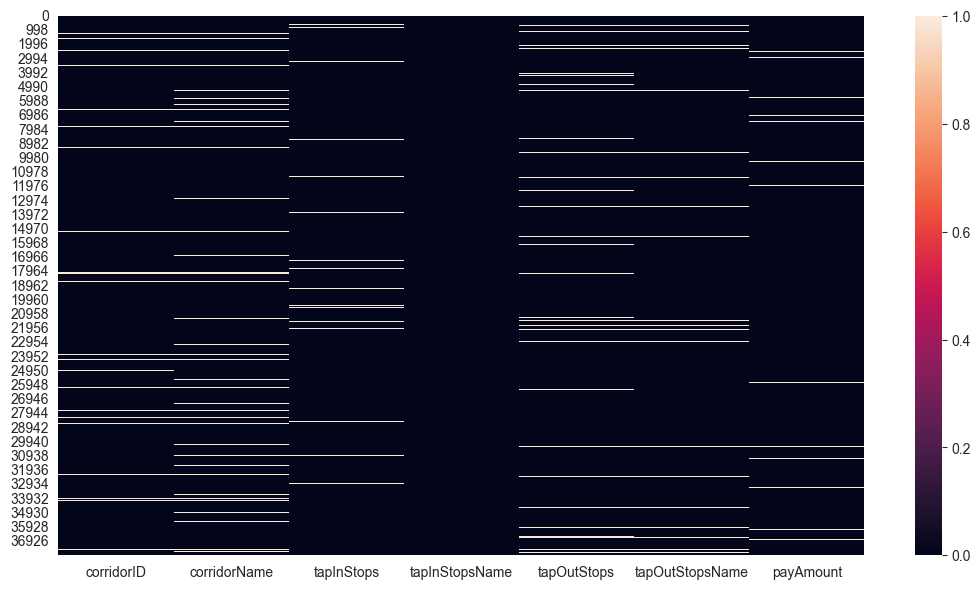

In [75]:
# Sebaran missing value di dalam data
plt.figure(figsize=(13,7))
sns.heatmap(tjDataset[['corridorID','corridorName', 'tapInStops','tapInStopsName','tapOutStops','tapOutStopsName','payAmount']].isna())

### corridorID dan corridorName

In [76]:
print("--- Proses Pengisian Missing Value untuk Koridor ---")
print("Jumlah missing value SEBELUM proses:")
print(tjDataset[['corridorID', 'corridorName']].isnull().sum())


# Langkah 1: Buat tabel referensi dari data yang 100% lengkap
# Kita ambil baris di mana kedua kolom (ID dan Nama) tidak ada yang kosong.
koridor_ref = tjDataset.dropna(subset=['corridorID', 'corridorName']).drop_duplicates(subset=['corridorID'])

# Langkah 2: Buat "kamus" atau pemetaan dari referensi tersebut
# Peta dari ID ke Nama
id_to_name_map = pd.Series(koridor_ref.corridorName.values, index=koridor_ref.corridorID).to_dict()
# Peta dari Nama ke ID (kita buat referensi baru untuk memastikan nama unik)
name_ref = koridor_ref.drop_duplicates(subset=['corridorName'])
name_to_id_map = pd.Series(name_ref.corridorID.values, index=name_ref.corridorName).to_dict()

# Langkah 3: Terapkan pemetaan untuk mengisi nilai yang kosong
# Isi 'corridorName' yang kosong menggunakan 'corridorID' yang ada
tjDataset['corridorName'] = tjDataset['corridorName'].fillna(tjDataset['corridorID'].map(id_to_name_map))

# Isi 'corridorID' yang kosong menggunakan 'corridorName' yang ada
tjDataset['corridorID'] = tjDataset['corridorID'].fillna(tjDataset['corridorName'].map(name_to_id_map))


# Langkah 4: Verifikasi hasil akhir
print("\nJumlah missing value SETELAH proses:")
print(tjDataset[['corridorID', 'corridorName']].isnull().sum())

print("\n✅ Proses selesai.")
print("Berikut contoh data setelah diisi:")
display(tjDataset[['corridorID', 'corridorName']].head())

# Untuk melanjutkan, Anda bisa menimpa DataFrame lama Anda
# df_gabungan = df_to_fill.copy()

--- Proses Pengisian Missing Value untuk Koridor ---
Jumlah missing value SEBELUM proses:
corridorID      1257
corridorName    1930
dtype: int64

Jumlah missing value SETELAH proses:
corridorID      1125
corridorName    1125
dtype: int64

✅ Proses selesai.
Berikut contoh data setelah diisi:


,corridorID,corridorName
0,5,Matraman Baru - Ancol
1,6C,Stasiun Tebet - Karet via Patra Kuningan
2,R1A,Pantai Maju - Kota
3,11D,Pulo Gebang - Pulo Gadung 2 via PIK
4,12,Tanjung Priok - Pluit


In [77]:
missing_start_seq = tjDataset[tjDataset['corridorID'].isna()]
missing_start_seq.head(3)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tanggal,nama_hari,kelompok_hari,durasi_menit,jam_keberangkatan,kelompok_jam
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1970-01-01 00:00:00.000001991,NaN,NaN,1.0,B03416P,SDN Pondok Labu 11,-6.313269,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0,3,Senin,Weekday,27.316667,6,Jam Berangkat Kerja
120,MCWO805A6Q66MX,3570416613897992,dki,"Gawati Damanik, S.E.",F,1970-01-01 00:00:00.000002010,NaN,NaN,0.0,P00109,Matraman Baru,-6.212880,106.86115,8,2023-04-03 06:38:44,P00224,Slamet Riyadi,-6.208533,106.85929,9.0,2023-04-03 07:32:11,3500.0,3,Senin,Weekday,53.450000,6,Jam Berangkat Kerja
240,PTDK452M9A71XF,342370004909630,emoney,"Kartika Habibi, S.Psi",M,1970-01-01 00:00:00.000001975,NaN,NaN,0.0,B04505P,Sbr. Standard Chartered,-6.217407,106.81934,13,2023-04-03 05:13:16,B03396P,Kota Kasablanka,-6.224688,106.84246,20.0,2023-04-03 05:39:55,3500.0,3,Senin,Weekday,26.650000,5,Jam Berangkat Kerja


Missing value pada corridorID dan corridorName terjadi pada row data yang sama, sehingga tidak dapat menggunakan mapping untuk melengkapi missing valuenya.
- Missing Value ini tidak dapat ditindak lanjut karena beberapa alasan berikut:
    * Data yang dapat terisi missing valuenya adalah data yang mana hanya ada missing 1 value diantara 2 fitur (corridorID dan corridorName), jika keduanya kosong tidak dapat ditindak lanjut
    * Dari 1125 data ini tidak dapat dicari kesamaannya hanya dengan tapInStops dan tapOutStops karena memiliki sequence yang berbeda. Dengan melihat kondisi bahwa 1 stops bisa melayani beberapa koridor, maka akan sangat sulit untuk mengisi missing value saat ini
    * Jika ingin mengisi missing value, diperlukan data dengan periode pengamatan lebih jauh, dengan ekpektasi bahwa akan ditemukan kesamaan tapInStops + startSeq dengan tapOutStops + endSeq yang dapat diambil kesimpulan bahwa memang corridor yang sama. Alasan ini diambil karena setiap corridor memiliki startSeq yang berbeda-beda, sehingga stopName yang sama bisa memiliki startSeq yang berbeda.

### tapIn dan tapOut
- Membuat tabel refensi dengan mengumpulkan data tapInStops dan tapOutStops yang sudah dibersihkan untuk mengisi missing value.
- Dengan membuat kriteria tapStops, tapStopsName, tapStopsLat dan tapStopsLon sebagai satu kesatuan identitas yang tidak dapat dipisahkan. 

In [78]:
# Definisikan kelompok kolom yang akan kita proses kali ini
tapin_cols = ['tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']
tapout_cols = ['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']

print("Jumlah Missing Value SEBELUM proses pengisian:")
print(tjDataset[tapin_cols + tapout_cols].isnull().sum())

Jumlah Missing Value SEBELUM proses pengisian:
tapInStops         1213
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
tapOutStops        2289
tapOutStopsName    1344
tapOutStopsLat     1344
tapOutStopsLon     1344
dtype: int64


In [79]:
print("--- Membuat Tabel Referensi Utama untuk Semua Halte ---")

# 1. Siapkan data TapIn dengan nama kolom generik
stops_from_tapin = tjDataset[tapin_cols].copy()
stops_from_tapin.columns = ['stopID', 'stopName', 'stopLat', 'stopLon']

# 2. Siapkan data TapOut dengan nama kolom generik yang sama
stops_from_tapout = tjDataset[tapout_cols].copy()
stops_from_tapout.columns = ['stopID', 'stopName', 'stopLat', 'stopLon']

# 3. Gabungkan kedua sumber data menjadi satu
master_stops = pd.concat([stops_from_tapin, stops_from_tapout], ignore_index=True)

# 4. Buat tabel referensi final:
#    - Hapus baris yang datanya tidak lengkap (NaN)
#    - Hapus duplikat berdasarkan ID Halte (stopID) untuk memastikan setiap halte hanya punya satu data (ID, Nama, Lat, Lon) yang valid.
stops_ref = master_stops.dropna().drop_duplicates()

print(f"Tabel referensi utama berhasil dibuat dengan {len(stops_ref)} data halte unik.")
print("Contoh isi tabel referensi:")
stops_ref.head(3)

--- Membuat Tabel Referensi Utama untuk Semua Halte ---
Tabel referensi utama berhasil dibuat dengan 3601 data halte unik.
Contoh isi tabel referensi:


,stopID,stopName,stopLat,stopLon
0,P00142,Pal Putih,-6.184631,106.84402
1,B01963P,Kemenkes 2,-6.228700,106.83302
2,B00499P,Gg. Kunir II,-6.133132,106.81435


In [80]:
print("\n--- Membuat Mapping dari Tabel Referensi ---")

# Prioritas utama adalah mapping berdasarkan ID, karena ID seharusnya unik.
id_to_name_map = pd.Series(stops_ref.stopName.values, index=stops_ref.stopID).to_dict()
id_to_lat_map = pd.Series(stops_ref.stopLat.values, index=stops_ref.stopID).to_dict()
id_to_lon_map = pd.Series(stops_ref.stopLon.values, index=stops_ref.stopID).to_dict()

# Kita juga buat mapping dari Nama ke ID, untuk kasus di mana ID-nya kosong tapi namanya ada.
# Kita pastikan nama halte di referensi juga unik untuk mapping yang akurat.
name_ref = stops_ref.drop_duplicates(subset=['stopName'], keep='first')
name_to_id_map = pd.Series(name_ref.stopID.values, index=name_ref.stopName).to_dict()

print("Mapping berhasil dibuat.")


--- Membuat Mapping dari Tabel Referensi ---
Mapping berhasil dibuat.


In [81]:
print("\n--- Mengisi Missing Values Menggunakan Referensi Utama ---")

# --- Mengisi Grup TapIn ---
# Mengisi Nama, Lat, Lon berdasarkan ID
tjDataset['tapInStopsName'] = tjDataset['tapInStopsName'].fillna(tjDataset['tapInStops'].map(id_to_name_map))
tjDataset['tapInStopsLat'] = tjDataset['tapInStopsLat'].fillna(tjDataset['tapInStops'].map(id_to_lat_map))
tjDataset['tapInStopsLon'] = tjDataset['tapInStopsLon'].fillna(tjDataset['tapInStops'].map(id_to_lon_map))
# Mengisi ID berdasarkan Nama (jika ID masih kosong)
tjDataset['tapInStops'] = tjDataset['tapInStops'].fillna(tjDataset['tapInStopsName'].map(name_to_id_map))


# --- Mengisi Grup TapOut ---
# Mengisi Nama, Lat, Lon berdasarkan ID
tjDataset['tapOutStopsName'] = tjDataset['tapOutStopsName'].fillna(tjDataset['tapOutStops'].map(id_to_name_map))
tjDataset['tapOutStopsLat'] = tjDataset['tapOutStopsLat'].fillna(tjDataset['tapOutStops'].map(id_to_lat_map))
tjDataset['tapOutStopsLon'] = tjDataset['tapOutStopsLon'].fillna(tjDataset['tapOutStops'].map(id_to_lon_map))
# Mengisi ID berdasarkan Nama (jika ID masih kosong)
tjDataset['tapOutStops'] = tjDataset['tapOutStops'].fillna(tjDataset['tapOutStopsName'].map(name_to_id_map))

print("Proses pengisian selesai.")


--- Mengisi Missing Values Menggunakan Referensi Utama ---
Proses pengisian selesai.


In [82]:
print("\n--- Pengecekan Akhir Jumlah Missing Value ---")
final_missing_counts = tjDataset[tapin_cols + tapout_cols].isnull().sum()
print(final_missing_counts)

# Cek apakah masih ada missing value yang tersisa
if final_missing_counts.sum() == 0:
    print("\nSelamat! Semua missing value pada kolom TapIn dan TapOut berhasil diisi.")
else:
    print("\nPerhatian: Masih ada beberapa missing value yang tersisa.")
    print("Ini kemungkinan terjadi jika dalam satu baris, baik ID maupun Nama halte sama-sama kosong, sehingga tidak ada kunci untuk mencari referensinya.")


--- Pengecekan Akhir Jumlah Missing Value ---
tapInStops           22
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
tapOutStops        1353
tapOutStopsName    1344
tapOutStopsLat     1344
tapOutStopsLon     1344
dtype: int64

Perhatian: Masih ada beberapa missing value yang tersisa.
Ini kemungkinan terjadi jika dalam satu baris, baik ID maupun Nama halte sama-sama kosong, sehingga tidak ada kunci untuk mencari referensinya.


#### tapIN

In [83]:
missing_tapIn = tjDataset[tjDataset['tapInStops'].isna() & tjDataset['tapInStopsName'].notna()].copy()
missing_tapIn.head(3)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tanggal,nama_hari,kelompok_hari,durasi_menit,jam_keberangkatan,kelompok_jam
32365,GFXI432F3W42KE,342872650777880,emoney,Carla Maryati,F,1970-01-01 00:00:00.000002006,S11,BSD - Jelambar,0.0,NaN,Bundaran Alam Sutera 1,-6.244107,106.64889,16,2023-04-09 19:53:59,B02990P,Pratama Abadi,-6.233124,106.64256,19.0,2023-04-09 20:17:31,3500.0,9,Minggu,Weekend,23.533333,19,Jam Pulang Kerja
32533,SJEG609E5A77VR,3511593949794788,dki,Humaira Maryadi,F,1970-01-01 00:00:00.000001992,12B,Pluit - Senen,1.0,NaN,Graha Sindu Bpk Penabur,-6.159971,106.83509,8,2023-04-09 18:46:36,B00122P,Baywalk 2,-6.110359,106.77961,41.0,2023-04-09 19:36:31,3500.0,9,Minggu,Weekend,49.916667,18,Jam Pulang Kerja
32572,OHMY262Z9S32VK,3531560183774236,dki,Kiandra Nashiruddin,M,1970-01-01 00:00:00.000001993,JAK.58,Cilincing - Rorotan,1.0,NaN,Rusun Rorotan 2,-6.149932,106.95478,0,2023-04-08 06:45:49,B05328P,SMKN Jasalena Marunda,-6.127384,106.95669,24.0,2023-04-08 07:10:38,0.0,8,Sabtu,Weekend,24.816667,6,Jam Berangkat Kerja


In [84]:
summary_tapIn = missing_tapIn.groupby('tapInStopsName').size().reset_index(name='count(tapInStopsName)')
summary_tapIn

,tapInStopsName,count(tapInStopsName)
0,Bundaran Alam Sutera 1,1
1,Cipinang,1
2,Cipinang Lontar Rusun Polri,1
3,Fatmawati 1,1
4,Gg. Al Mawaddah Tengah,1
5,Graha Sindu Bpk Penabur,1
6,Green Lake City,1
7,Jln. Pinang 1,1
8,Kec. Pondok Gede,1
9,Kel. Balekambang,1


Dari 1213 missing value pada tapInStops, setelah proses pengisian masih terdapat 22 missing value. Dimana setelah cek lebih lanjut, 22 data ini merupakan tapInStopsName yang baru dan belum terdaftar. Sehingga data ini tidak dapat digunakan untuk analisa lebih lanjut karena tidak merepresentasikan layanan transjakarta secara lengkap.

- Catatan : Apabila dikemudian hari, tapInStopsName ini sudah diberikan identitas dan menjadi bagian layanan yang terdata. Maka data ini bisa dipanggil kembali sebagai data yang bisa dianalisis lebih lanjut

#### tapOut

In [85]:
missing_tapOut = tjDataset[tjDataset['tapOutStops'].isna() & tjDataset['tapOutStopsName'].isna()].copy()
print(f"Jumlah baris data dengan tapOut yang tidak dapat diidentifikasi adalah: {len(missing_tapOut)} .")
missing_tapOut.head(3)

Jumlah baris data dengan tapOut yang tidak dapat diidentifikasi adalah: 1344 .


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tanggal,nama_hari,kelompok_hari,durasi_menit,jam_keberangkatan,kelompok_jam
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1970-01-01 00:00:00.000001974,JAK.18,Kalibata - Kuningan,0.0,B00243P,Cervino Village,-6.224355,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,nan,NaT,0.0,3,Senin,Weekday,NaN,6,Jam Berangkat Kerja
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1970-01-01 00:00:00.000001995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,18 Office Park,-6.299146,106.83210,19,2023-04-03 06:14:02,NaN,NaN,NaN,NaN,nan,NaT,0.0,3,Senin,Weekday,NaN,6,Jam Berangkat Kerja
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1970-01-01 00:00:00.000001981,1T,Cibubur - Balai Kota,0.0,B02408P,Menara Astra,-6.207361,106.82190,7,2023-04-03 05:57:55,NaN,NaN,NaN,NaN,nan,NaT,20000.0,3,Senin,Weekday,NaN,5,Jam Berangkat Kerja


In [86]:
unknown_tapOut = tjDataset[tjDataset['tapOutStops'].isna() & tjDataset['tapOutStopsName'].notna()].copy()
print(f"Jumlah baris data dengan tapOut yang tidak terdaftar adalah: {len(unknown_tapOut)} .")
unknown_tapOut.head(3)


Jumlah baris data dengan tapOut yang tidak terdaftar adalah: 9 .


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tanggal,nama_hari,kelompok_hari,durasi_menit,jam_keberangkatan,kelompok_jam
32068,BXRQ766N7W94KH,3582791887979981,dki,Tgk. Keisha Hutasoit,M,1970-01-01 00:00:00.000001973,JAK.02,Kampung Melayu - Duren Sawit,0.0,B05022P,Simpang Otista III Utara,-6.231843,106.86776,2,2023-04-08 16:32:00,NaN,Jln. H. Yahya,-6.230219,106.87122,5.0,2023-04-08 17:20:01,0.0,8,Sabtu,Weekend,48.016667,16,Jam Pulang Kerja
32960,SLEX356F6M31TA,4713105079051022,dki,Gangsar Palastri,F,1970-01-01 00:00:00.000001984,JAK.64,Lenteng Agung - Aseli,1.0,B04556P,Sbr. TK Kartika VIII -13,-6.345264,106.82746,2,2023-04-16 09:06:57,NaN,MIN 8 Srengseng Sawah,-6.335943,106.82628,17.0,2023-04-16 10:59:28,0.0,16,Minggu,Weekend,112.516667,9,Jam Kerja
33961,POUD123Y3H41XB,4300964686794,online,Ir. Prakosa Maryadi,F,1970-01-01 00:00:00.000001994,JAK.21,Cililitan - Dwikora,0.0,B01724P,Jasa Marga Cililitan 2,-6.264703,106.87224,5,2023-04-23 06:17:27,NaN,Grha Intirub,-6.265216,106.87599,7.0,2023-04-23 08:08:49,0.0,23,Minggu,Weekend,111.366667,6,Jam Berangkat Kerja


In [87]:
summary_unknown = unknown_tapOut.groupby('tapInStopsName').size().reset_index(name='count(tapInStopsName)')
print(f"Detail stop yang tidak terdaftar.")
summary_unknown
    

Detail stop yang tidak terdaftar.


,tapInStopsName,count(tapInStopsName)
0,Haris Hotel Kelapa Gading,1
1,IBI-K 57,1
2,Jasa Marga Cililitan 2,1
3,Polsek Makasar,1
4,Sbr. Gg. H. Loong Tengah,1
5,Sbr. Komplek Kijang Kencana,1
6,Sbr. TK Kartika VIII -13,1
7,Simpang Kopi Roa Malaka,1
8,Simpang Otista III Utara,1


Dari 1353 missing value pada tapOutStops berikut informasi yang bisa ditarik : 
- 1334 missing value adalah data pengguna transjakarta yang tidak tapOut
- 9 missing value lainnya adalah tapOutStopsName yang baru dan belum terdaftar
Jadi data ini tidak dapat digunakan untuk analisa lebih lanjut karena tidak merepresentasikan layanan transjakarta secara lengkap


- Catatan : Apabila dikemudian hari, tapOutStopsName ini sudah diberikan identitas dan menjadi bagian layanan yang terdata. Maka data ini bisa dipanggil kembali sebagai data yang bisa dianalisis lebih lanjut

### Cleaning corridor, tapIn, tapOut

Tahap ini menggabungkan proses pengisian missing value untuk fitur berikut:
* corridor (corridorID, corridorName)
* tapIn (tapInStops, tapInStopsName, tapInStopsLat, tapInStopsLon)
* tapOut (tapOutStops,tapOutStopsName, tapOutStopsLat,tapOutStopsLon)

In [88]:
# Definisikan kolom-kolom kritis yang datanya harus lengkap
missing_cols = [
    'corridorID', 'corridorName',
    'tapInTime', 'tapOutTime',
    'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq',
    'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq'
]

print(f"Jumlah baris dalam dataset SEBELUM pembersihan: {len(tjDataset)}")
print("\nJumlah sisa missing value pada kolom-kolom kritis:")
print(tjDataset[missing_cols].isnull().sum())

Jumlah baris dalam dataset SEBELUM pembersihan: 37900

Jumlah sisa missing value pada kolom-kolom kritis:
corridorID         1125
corridorName       1125
tapInTime             0
tapOutTime         1344
tapInStops           22
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
stopStartSeq          0
tapOutStops        1353
tapOutStopsName    1344
tapOutStopsLat     1344
tapOutStopsLon     1344
stopEndSeq            0
dtype: int64


In [89]:
# Simpan jumlah baris sebelum penghapusan untuk laporan
rows_before_cleaning = len(tjDataset)

print(f"Menjalankan pembersihan pada {len(missing_cols)} kolom kritis...")

# Gunakan .dropna() dengan argumen 'subset'
# Ini akan menghapus sebuah baris HANYA JIKA ada nilai NaN di salah satu kolom yang disebutkan dalam 'missing_cols'
tjdataset_cleaned = tjDataset.dropna(subset=missing_cols)

rows_after_cleaning = len(tjdataset_cleaned)
rows_deleted = rows_before_cleaning - rows_after_cleaning

print("\n--- LAPORAN PEMBERSIHAN ---")
print(f"Jumlah baris sebelum: {rows_before_cleaning}")
print(f"Jumlah baris setelah: {rows_after_cleaning}")
print(f"Jumlah baris yang dihapus: {rows_deleted}")

# Untuk melanjutkan pekerjaan, kita akan gunakan DataFrame yang sudah bersih
# Kita buat salinannya agar tidak mengganggu df_cleaned jika kita ingin membandingkan lagi nanti
tj_cleaned_1 = tjdataset_cleaned.copy()

print("\nDataFrame utama telah diperbarui dengan data yang sudah bersih.")

Menjalankan pembersihan pada 14 kolom kritis...

--- LAPORAN PEMBERSIHAN ---
Jumlah baris sebelum: 37900
Jumlah baris setelah: 35447
Jumlah baris yang dihapus: 2453

DataFrame utama telah diperbarui dengan data yang sudah bersih.


<Axes: >

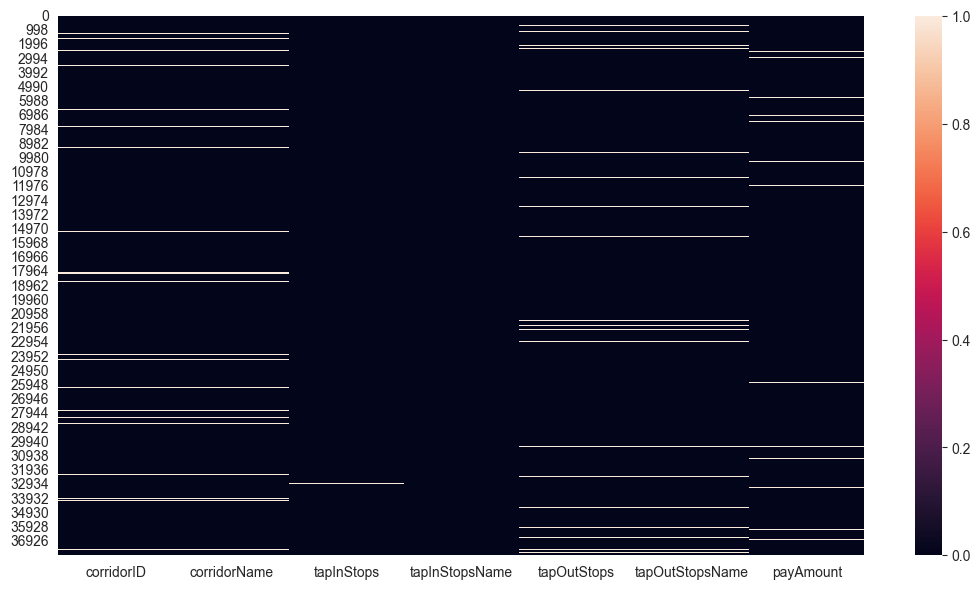

In [90]:
# Sebaran missing value di dalam data after proses tahap 1
plt.figure(figsize=(13,7))
sns.heatmap(tjDataset[['corridorID','corridorName', 'tapInStops','tapInStopsName','tapOutStops','tapOutStopsName','payAmount']].isna())

In [91]:
tj_cleaned_1.to_excel("transjakarta_clean_1.xlsx")

### PayAmount

In [92]:
tj_cleaned_1.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops            0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount            941
tanggal                0
nama_hari              0
kelompok_hari          0
durasi_menit           0
jam_keberangkatan      0
kelompok_jam           0
dtype: int64

In [93]:
print("Membuat tabel referensi untuk nilai payAmount unik per koridor...")

# Kelompokkan data berdasarkan 'corridorID', lalu ambil semua nilai unik dari 'payAmount' untuk setiap koridor
pay_amount_ref = tj_cleaned_1.groupby('corridorID')['payAmount'].unique().reset_index()

# Ubah nama kolom agar lebih deskriptif
pay_amount_ref.rename(columns={'payAmount': 'unique_pay_amounts'}, inplace=True)

print("Tabel referensi berhasil dibuat:")
display(pay_amount_ref)

Membuat tabel referensi untuk nilai payAmount unik per koridor...
Tabel referensi berhasil dibuat:


,corridorID,unique_pay_amounts
0,1,[3500.0]
1,10,[3500.0]
2,10A,[0.0]
3,10B,[0.0]
4,10D,[3500.0]
...,...,...
216,S21,[3500.0]
217,S22,[3500.0]
218,S31,[20000.0]
219,T11,[3500.0]


In [94]:
pay_varian = tj_cleaned_1.groupby('payAmount')['payAmount'].count()
pay_varian

payAmount
0.0        15553
3500.0     17307
20000.0     1646
Name: payAmount, dtype: int64

In [95]:
print("Menganalisis distribusi payAmount untuk setiap koridor...")

# Langkah 1: Kelompokkan berdasarkan koridor, lalu hitung jumlah setiap nilai payAmount.
# dropna=False sangat penting agar nilai NaN (kosong) juga ikut dihitung.
pay_counts = tj_cleaned_1.groupby('corridorID')['payAmount'].value_counts(dropna=True)

# Langkah 2: Gunakan .unstack() untuk "memutar" tabel.
# Ini akan mengubah nilai-nilai payAmount menjadi kolom-kolom.
# fill_value=0 akan mengisi 0 jika suatu koridor tidak memiliki tipe pembayaran tertentu.
count_summary = pay_counts.unstack(fill_value=0)

# Langkah 4: Pilih dan urutkan hanya kolom yang kita inginkan (0, 3500, 20000)
desired_cols = [0, 3500, 20000]
# Filter untuk memastikan kita hanya memilih kolom yang benar-benar ada di data untuk menghindari error
existing_cols = [col for col in desired_cols if col in count_summary.columns]
count_summary = count_summary[existing_cols]


print("\nTabel Jumlah Transaksi per Kategori payAmount:")
display(count_summary)

Menganalisis distribusi payAmount untuk setiap koridor...

Tabel Jumlah Transaksi per Kategori payAmount:


payAmount,0.0,3500.0,20000.0
corridorID,,,
1,0,228,0
10,0,99,0
10A,136,0,0
10B,129,0,0
10D,0,160,0
...,...,...,...
S21,0,376,0
S22,0,134,0
S31,0,0,145


In [96]:
# Langkah 5: Hitung total transaksi per koridor untuk dasar perhitungan persentase.
total_per_corridor = count_summary.sum(axis=1)

# Langkah 6: Hitung persentase dengan membagi setiap sel dengan total per barisnya.
percentage_summary = count_summary.div(total_per_corridor, axis=0) * 100

# Langkah 7: Gabungkan tabel jumlah (count) dan persentase menjadi satu tabel final.
# Kita gunakan pd.concat dengan 'keys' untuk membuat header kolom multi-level.
final_summary_table = pd.concat(
    [count_summary, percentage_summary],
    axis='columns',
    keys=['Jumlah Transaksi', 'Persentase']
)

# Langkah 8 (Opsional tapi direkomendasikan): Format angka persentase agar lebih rapi.
# Kita akan memformat setiap sel di bawah 'Persentase' menjadi string dengan 2 angka desimal dan simbol '%'.
for col in existing_cols:
    final_summary_table[('Persentase', col)] = final_summary_table[('Persentase', col)].apply(lambda x: f"{x:.2f}%")


print("\n--- Tabel Ringkasan Final: Jumlah & Persentase payAmount per Koridor ---")
display(final_summary_table)


--- Tabel Ringkasan Final: Jumlah & Persentase payAmount per Koridor ---


Jumlah Transaksi                 Persentase                  
payAmount           0.0     3500.0  20000.0    0.0      3500.0   20000.0
corridorID                                                              
1                         0     228       0      0.00%  100.00%    0.00%
10                        0      99       0      0.00%  100.00%    0.00%
10A                     136       0       0    100.00%    0.00%    0.00%
10B                     129       0       0    100.00%    0.00%    0.00%
10D                       0     160       0      0.00%  100.00%    0.00%
...                     ...     ...     ...        ...      ...      ...
S21                       0     376       0      0.00%  100.00%    0.00%
S22                       0     134       0      0.00%  100.00%    0.00%
S31                       0       0     145      0.00%    0.00%  100.00%
T11                       0     255       0      0.00%  100.00%    0.00%
T21                       0       0     176      0.00%    0.00%  100.00%

[216 rows x 6 columns]

Poin penting terkait biaya transjakarta:
1. Tarif 3500 adalah untuk layanan transjakarta yang umum/reguler
2. Tarif 20000 adalah untuk layanan Royaltrans
3. Tarif 0 adalah untuk layanan Jaklingko (corridorID 'JAK')

Dari informasi ini, maka akan dilakukan penyesuaian data
1. untuk corridorID dengan unsur JAK akan disesuaikan ke payAMount 0
2. untuk corridorID dengan mayoritas payAmount 20000 yang diasumsikan sebagaai Royaltrans akan disesuaikan ke payAmount 20000 (berlaku untuk layanan transjakarta reguler)

Untuk pengisian missing value yang lebih tepat, maka dataset akan dipecah menjadi 3 sesuai dengan layanannya

#### Dataset Jaklingko

In [97]:
print("Memisahkan data untuk koridor dengan unsur 'JAK'...")

# Buat filter (mask) untuk memilih baris dengan corridorID yang mengandung 'JAK'
# regex=False untuk pencarian teks biasa yang lebih cepat. na=False untuk menangani jika ada ID yang kosong.
mask_jak = tj_cleaned_1['corridorID'].str.contains('JAK', na=False, regex=False)

# Buat DataFrame baru dari hasil filter.
# Menggunakan .copy() adalah praktik yang baik untuk memastikan 'df_jak' adalah DataFrame yang independen
# dan untuk menghindari 'SettingWithCopyWarning' jika Anda memodifikasinya nanti.
jak_df = tj_cleaned_1[mask_jak].copy()

print(f"\nDataFrame baru 'df_jak' berhasil dibuat.")
print(f"Jumlah baris: {len(jak_df)}")
print(f"Jumlah koridor 'JAK' unik: {jak_df['corridorID'].nunique()}")

print("\nBerikut 5 baris pertama dari dataset koridor JAK:")
display(jak_df.head())

Memisahkan data untuk koridor dengan unsur 'JAK'...

DataFrame baru 'df_jak' berhasil dibuat.
Jumlah baris: 12985
Jumlah koridor 'JAK' unik: 81

Berikut 5 baris pertama dari dataset koridor JAK:


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tanggal,nama_hari,kelompok_hari,durasi_menit,jam_keberangkatan,kelompok_jam
14,LZFD368Q3E81HJ,4056836188316,online,Nadine Utami,M,1970-01-01 00:00:00.000001975,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00608P,Gelanggang Remaja Pasar Minggu,-6.284615,106.837870,5,2023-04-03 05:38:44,B01062P,Jln. Gabus Raya,-6.301222,106.83623,17.0,2023-04-03 06:09:17,0.0,3,Senin,Weekday,30.550000,5,Jam Berangkat Kerja
19,ZYRL615G4C05RD,5430018591726410,dki,Karna Waskita,M,1970-01-01 00:00:00.000001981,JAK.88,Terminal Tanjung Priok - Ancol Barat,0.0,B00722P,Gunung Sahari Mangga Dua Timur,-6.137032,106.832540,20,2023-04-03 06:43:49,B05989P,Jln. Ancol Barat 6,-6.124810,106.81983,36.0,2023-04-03 07:30:45,0.0,3,Senin,Weekday,46.933333,6,Jam Berangkat Kerja
21,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1970-01-01 00:00:00.000001997,JAK.16,Cililitan - Condet,0.0,B02144P,Lippo Mall Kramat Jati,-6.270835,106.867410,4,2023-04-03 05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.85293,20.0,2023-04-03 05:30:45,0.0,3,Senin,Weekday,22.150000,5,Jam Berangkat Kerja
24,SYLN486U0E02TA,2295833910329055,dki,Taufik Farida,F,1970-01-01 00:00:00.000001981,JAK.02,Kampung Melayu - Duren Sawit,0.0,B05023P,Simpang Pahlawan Revolusi 1,-6.238658,106.899461,28,2023-04-03 05:43:14,B03135P,RS Duren Sawit 2,-6.232262,106.91019,39.0,2023-04-03 06:12:52,0.0,3,Senin,Weekday,29.633333,5,Jam Berangkat Kerja
40,UANX737M9L25GI,574726750023,flazz,drg. Lukita Rajata,F,1970-01-01 00:00:00.000001983,JAK.15,Bulak Turi - Tanjung Priok,0.0,B02761P,Pertamina Kilang Minyak,-6.108789,106.905370,41,2023-04-03 05:12:53,B01056P,Jln. Elpa Putih II,-6.110053,106.88721,50.0,2023-04-03 05:50:10,0.0,3,Senin,Weekday,37.283333,5,Jam Berangkat Kerja


In [98]:
jak_df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops            0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount            388
tanggal                0
nama_hari              0
kelompok_hari          0
durasi_menit           0
jam_keberangkatan      0
kelompok_jam           0
dtype: int64

In [99]:
pay_amount_jak = jak_df['payAmount'].value_counts(dropna= False)
pay_amount_jak


payAmount
0.0    12597
NaN      388
Name: count, dtype: int64

Masih ditemukan adanya data anomali pada payAmount layanan Jaklingko, maka dari itu nilai 3500 dan 20000 akan disesuaikan ke 0

In [100]:
jak_df['Service'] = 'Jaklingko'
jak_df['payAmount'] = jak_df['payAmount'].replace({3500: 0, 20000: 0})
jak_df['payAmount'] = jak_df['payAmount'].fillna(0)
pay_amount_jak_clean = jak_df['payAmount'].value_counts(dropna= False)
pay_amount_jak_clean

payAmount
0.0    12985
Name: count, dtype: int64

In [101]:
jak_df.isna().sum()

transID              0
payCardID            0
payCardBank          0
payCardName          0
payCardSex           0
payCardBirthDate     0
corridorID           0
corridorName         0
direction            0
tapInStops           0
tapInStopsName       0
tapInStopsLat        0
tapInStopsLon        0
stopStartSeq         0
tapInTime            0
tapOutStops          0
tapOutStopsName      0
tapOutStopsLat       0
tapOutStopsLon       0
stopEndSeq           0
tapOutTime           0
payAmount            0
tanggal              0
nama_hari            0
kelompok_hari        0
durasi_menit         0
jam_keberangkatan    0
kelompok_jam         0
Service              0
dtype: int64

#### Dataset  Royaltrans

In [102]:
print("Menganalisis dan memisahkan data untuk koridor dengan payAmount 20000 > 90%...")

# --- Bagian 1: Identifikasi Koridor ---
print("\nLangkah 1: Mengidentifikasi koridor target...")

# Hitung total transaksi untuk setiap koridor sebagai dasar pembagi
total_per_corridor = tj_cleaned_1.groupby('corridorID').size()

# Saring data yang payAmount-nya 20000, lalu hitung jumlahnya per koridor
count_20000_per_corridor = tj_cleaned_1[tj_cleaned_1['payAmount'] == 20000].groupby('corridorID').size()

# Gabungkan kedua hasil hitungan menjadi satu tabel analisis untuk memudahkan perhitungan.
# Koridor yang tidak punya transaksi 20000 akan diisi 0.
analysis_df = pd.concat([count_20000_per_corridor, total_per_corridor], axis=1, keys=['count_20000', 'total'])
analysis_df['count_20000'].fillna(0, inplace=True)

# Hitung persentase transaksi 20000 untuk setiap koridor
analysis_df['percentage_20000'] = (analysis_df['count_20000'] / analysis_df['total']) * 100

# Dapatkan daftar koridor yang persentasenya di atas 90%
list_koridor_20000 = analysis_df[analysis_df['percentage_20000'] > 90].index.tolist()

print(f"Ditemukan {len(list_koridor_20000)} koridor di mana transaksi dengan payAmount 20000 lebih dari 90%.")


# --- Bagian 2: Buat DataFrame Baru ---
if list_koridor_20000:
    print("\nLangkah 2: Membuat DataFrame baru berdasarkan daftar koridor tersebut...")
    
    # Saring DataFrame utama menggunakan .isin() dengan daftar koridor yang sudah ditemukan
    mask_koridor_20000 = tj_cleaned_1['corridorID'].isin(list_koridor_20000)
    royal_df = tj_cleaned_1[mask_koridor_20000].copy()

    print(f"\nDataFrame baru 'df_20000_dominant' berhasil dibuat.")
    print(f"Jumlah baris: {len(royal_df)}")
    print(f"Jumlah koridor unik: {royal_df['corridorID'].nunique()}")
    print("\nBerikut 5 baris pertama dari dataset tersebut:")
    display(royal_df.head())
else:
    print("\nTidak ada koridor yang memenuhi kriteria untuk dibuatkan dataset baru.")

Menganalisis dan memisahkan data untuk koridor dengan payAmount 20000 > 90%...

Langkah 1: Mengidentifikasi koridor target...
Ditemukan 10 koridor di mana transaksi dengan payAmount 20000 lebih dari 90%.

Langkah 2: Membuat DataFrame baru berdasarkan daftar koridor tersebut...

DataFrame baru 'df_20000_dominant' berhasil dibuat.
Jumlah baris: 1646
Jumlah koridor unik: 10

Berikut 5 baris pertama dari dataset tersebut:


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tanggal,nama_hari,kelompok_hari,durasi_menit,jam_keberangkatan,kelompok_jam
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1970-01-01 00:00:00.000001993,1T,Cibubur - Balai Kota,0.0,B00127P,Benhil 3,-6.216010,106.81632,3,2023-04-03 05:08:01,B00694P,Grand Sahid,-6.210975,106.82059,6.0,2023-04-03 05:52:25,20000.0,3,Senin,Weekday,44.400000,5,Jam Berangkat Kerja
8,OIHS248V7S72EB,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1970-01-01 00:00:00.000001992,B14,Bekasi Barat - Kuningan,1.0,B00795P,Imperium,-6.210363,106.83059,1,2023-04-03 06:01:44,B01853P,Kayuringin 2,-6.245948,106.99247,16.0,2023-04-03 06:51:12,20000.0,3,Senin,Weekday,49.466667,6,Jam Berangkat Kerja
60,RHUT145C1U25ZY,4290559479079,online,Lutfan Hakim,M,1970-01-01 00:00:00.000002011,T21,Palem Semi - Bundaran Senayan,1.0,B00589P,GBK Pintu 7,-6.222095,106.80861,3,2023-04-03 05:43:48,B02556P,Palem Semi 1,-6.218812,106.61807,14.0,2023-04-03 06:09:12,20000.0,3,Senin,Weekday,25.400000,5,Jam Berangkat Kerja
117,YTOA058V9U73VN,4709994160903,online,"Cut Gabriella Haryanti, S.Sos",M,1970-01-01 00:00:00.000001974,T21,Palem Semi - Bundaran Senayan,1.0,B00808P,Islamic,-6.228521,106.61473,10,2023-04-03 06:37:27,B02557P,Palem Semi 2,-6.220361,106.61649,12.0,2023-04-03 07:20:36,20000.0,3,Senin,Weekday,43.150000,6,Jam Berangkat Kerja
134,ESJQ990H8Q22LV,345711968178505,emoney,Kawaya Oktaviani,M,1970-01-01 00:00:00.000002009,1T,Cibubur - Balai Kota,1.0,B00102P,Balai Kota 1,-6.180598,106.82847,0,2023-04-03 05:28:11,B00360P,Flyover Karet 2,-6.214808,106.81847,11.0,2023-04-03 06:09:57,20000.0,3,Senin,Weekday,41.766667,5,Jam Berangkat Kerja


In [103]:
royal_df.isna().sum()

transID              0
payCardID            0
payCardBank          0
payCardName          0
payCardSex           0
payCardBirthDate     0
corridorID           0
corridorName         0
direction            0
tapInStops           0
tapInStopsName       0
tapInStopsLat        0
tapInStopsLon        0
stopStartSeq         0
tapInTime            0
tapOutStops          0
tapOutStopsName      0
tapOutStopsLat       0
tapOutStopsLon       0
stopEndSeq           0
tapOutTime           0
payAmount            0
tanggal              0
nama_hari            0
kelompok_hari        0
durasi_menit         0
jam_keberangkatan    0
kelompok_jam         0
dtype: int64

In [104]:
pay_amount_royal = royal_df['payAmount'].value_counts(dropna= False)
pay_amount_royal


payAmount
20000.0    1646
Name: count, dtype: int64

Masih ditemukan adanya data anomali pada payAmount layanan Royaltrans, maka dari itu nilai 3500 akan disesuaikan ke 20000

In [105]:
royal_df['Service'] = 'Royatltrans'
royal_df['payAmount'] = royal_df['payAmount'].replace({3500: 20000})

pay_amount_royal_clean = royal_df['payAmount'].value_counts(dropna= False)
pay_amount_royal_clean

payAmount
20000.0    1646
Name: count, dtype: int64

#### Dataset Reguler Transjakarta

In [106]:
# Diasumsikan DataFrame 'df', 'df_jak', dan 'df_20000_dominant' sudah ada dari sel-sel sebelumnya

print("Membuat dataset sisa...")

# Langkah 1: Dapatkan daftar semua corridorID yang sudah kita pisahkan
# Kita ambil dari DataFrame yang sudah dibuat agar konsisten
jak_corridors_list = jak_df['corridorID'].unique().tolist()
dominant_20k_corridors_list = royal_df['corridorID'].unique().tolist()

# Gabungkan kedua daftar tersebut menjadi satu daftar pengecualian (exclusion list)
# Kita gunakan set() untuk memastikan tidak ada duplikat jika ada koridor yang tumpang tindih
exclusion_list = list(set(jak_corridors_list + dominant_20k_corridors_list))

print(f"\nTotal koridor yang akan dikecualikan: {len(exclusion_list)}")

# Langkah 2: Buat masker untuk memilih baris yang corridorID-nya TIDAK ADA di dalam exclusion_list
# Tanda ~ (tilde) berfungsi sebagai operator NOT
mask_sisa = ~tj_cleaned_1['corridorID'].isin(exclusion_list)

# Langkah 3: Buat DataFrame baru berisi data sisa
reg_df = tj_cleaned_1[mask_sisa].copy()

print(f"\nDataFrame baru 'df_sisa' berhasil dibuat.")
print(f"Jumlah baris: {len(reg_df)}")
print(f"Jumlah koridor unik: {reg_df['corridorID'].nunique()}")
print("\nBerikut 5 baris pertama dari dataset sisa:")
display(reg_df.head())

Membuat dataset sisa...

Total koridor yang akan dikecualikan: 91

DataFrame baru 'df_sisa' berhasil dibuat.
Jumlah baris: 20816
Jumlah koridor unik: 130

Berikut 5 baris pertama dari dataset sisa:


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tanggal,nama_hari,kelompok_hari,durasi_menit,jam_keberangkatan,kelompok_jam
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,1970-01-01 00:00:00.000002008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,3,Senin,Weekday,39.150000,5,Jam Berangkat Kerja
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1970-01-01 00:00:00.000001997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,3,Senin,Weekday,57.283333,5,Jam Berangkat Kerja
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1970-01-01 00:00:00.000001992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,3,Senin,Weekday,51.816667,5,Jam Berangkat Kerja
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1970-01-01 00:00:00.000001978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,3,Senin,Weekday,43.416667,5,Jam Berangkat Kerja
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1970-01-01 00:00:00.000001982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,3,Senin,Weekday,39.466667,6,Jam Berangkat Kerja


In [107]:
reg_df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops            0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount            553
tanggal                0
nama_hari              0
kelompok_hari          0
durasi_menit           0
jam_keberangkatan      0
kelompok_jam           0
dtype: int64

In [108]:
pay_amount_reg = reg_df['payAmount'].value_counts(dropna= False)
pay_amount_reg


payAmount
3500.0    17307
0.0        2956
NaN         553
Name: count, dtype: int64

In [109]:
reg_df['Service'] = 'Transjakarta'
reg_df['payAmount'] = reg_df['payAmount'].replace({0: 3500, 20000: 3500})
reg_df['payAmount'] = reg_df['payAmount'].fillna(3500)
pay_amount_reg_clean = reg_df['payAmount'].value_counts(dropna= False)
pay_amount_reg_clean

payAmount
3500.0    20816
Name: count, dtype: int64

### Append Dataset (Jaklingko, Royaltrans, Transjakarta)

Proses pembersihan data sudah selesai. Karena dalam proses tadi kita membagi dataset menjadi 3, maka 3 dateset akan digabungkan. Selanjutnya akan dilakukan cek singkat untuk data sebelum masuk proses analisa.

In [110]:
print("Menggabungkan 3 dataset (JAK, Reg, dan Royal)...")

# Buat daftar (list) dari semua DataFrame yang akan digabungkan
list_of_dfs_to_combine = [jak_df, royal_df, reg_df]

# Gunakan pd.concat untuk menggabungkan semua DataFrame dalam list.
# ignore_index=True sangat penting untuk membuat ulang indeks baru yang berurutan (0, 1, 2, ...).
clean_df = pd.concat(list_of_dfs_to_combine, ignore_index=True)

print("\n✅ Dataset berhasil digabungkan kembali ke dalam DataFrame 'df_gabungan'.")

Menggabungkan 3 dataset (JAK, Reg, dan Royal)...

✅ Dataset berhasil digabungkan kembali ke dalam DataFrame 'df_gabungan'.


In [111]:
clean_df['Service'].value_counts(dropna= False)
clean_df.info()
clean_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35447 entries, 0 to 35446
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transID            35447 non-null  object        
 1   payCardID          35447 non-null  object        
 2   payCardBank        35447 non-null  object        
 3   payCardName        35447 non-null  object        
 4   payCardSex         35447 non-null  object        
 5   payCardBirthDate   35447 non-null  datetime64[ns]
 6   corridorID         35447 non-null  object        
 7   corridorName       35447 non-null  object        
 8   direction          35447 non-null  float64       
 9   tapInStops         35447 non-null  object        
 10  tapInStopsName     35447 non-null  object        
 11  tapInStopsLat      35447 non-null  float64       
 12  tapInStopsLon      35447 non-null  float64       
 13  stopStartSeq       35447 non-null  object        
 14  tapInT

transID              0
payCardID            0
payCardBank          0
payCardName          0
payCardSex           0
payCardBirthDate     0
corridorID           0
corridorName         0
direction            0
tapInStops           0
tapInStopsName       0
tapInStopsLat        0
tapInStopsLon        0
stopStartSeq         0
tapInTime            0
tapOutStops          0
tapOutStopsName      0
tapOutStopsLat       0
tapOutStopsLon       0
stopEndSeq           0
tapOutTime           0
payAmount            0
tanggal              0
nama_hari            0
kelompok_hari        0
durasi_menit         0
jam_keberangkatan    0
kelompok_jam         0
Service              0
dtype: int64

In [112]:
clean_df.to_excel('Transjakarta_analysis.xlsx')

Sebelum melakukan pembersihan data, kita memiliki 37900 data. Sekarang kita memiliki 35447 data yang sudah dibersihkan. Pada prosesnya, sekitar 2453 / 6,47% data dihapus karena belum relevan dengan proses analisa yang akan dilakukan.

# Data Analysis

## Analisis Transaksi

Pada analisa ini, kita mencari tahu perbandingan jumlah pengguna layanan transjakarta dari 'jenis kelamin'.Kita akan membandingkan 'jenis kelamin' dengan feature yang berkaitan dengan waktu. Dengan mengambil sudut pandang internal Transjakarta, maka pada analisa ini kita akan menghitung jumlah transaksi sebagai pengguna. Kita tidak menggunakan payCardID sebagai pengguna karena tidak mengukur loyalitas pada layanan.

Pada analisa ini, diharapkan akan menjawab pertanyaan berikut:
* Berapa proporsi 'jenis kelamin' pengguna layanan Transjakarta?
* Apakah ada pola tertentu pada 'jenis kelamin' pengguna layanan di kelompok jam tertentu atau hari tertentu?
* Apakah ada pola tertentu pada 'jenis kelamin' pengguna layanan di tanggal tertentu?

--- 1. Perbandingan Jumlah Pengguna (M vs F) ---
Jumlah Pengguna berdasarkan payCardSex:
payCardSex
F    18857
M    16590
Name: count, dtype: int64


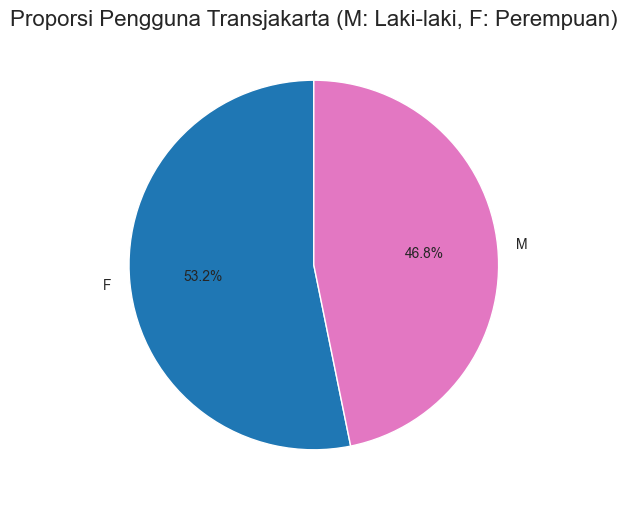


--- 2. Analisis Rata-Rata Pengguna per Kategori Waktu ---


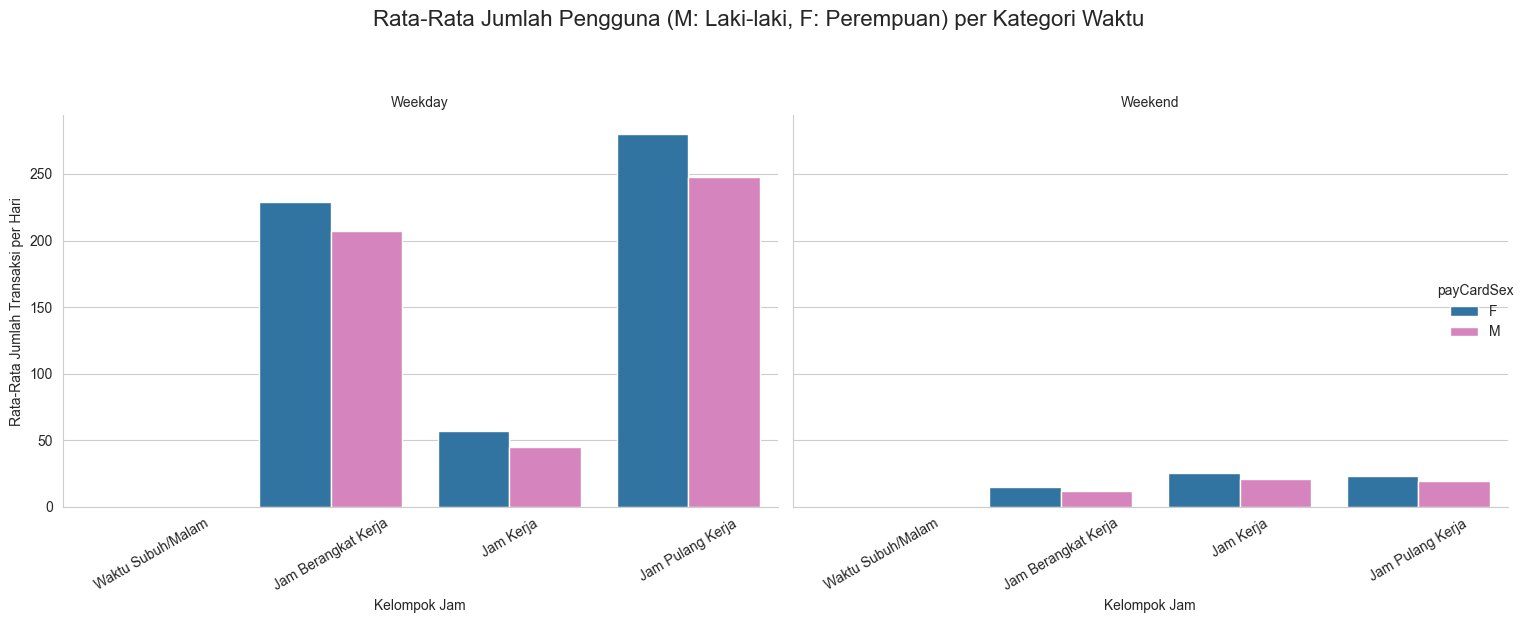


--- 3. Perbandingan Tren Harian Pengguna (M vs F) ---


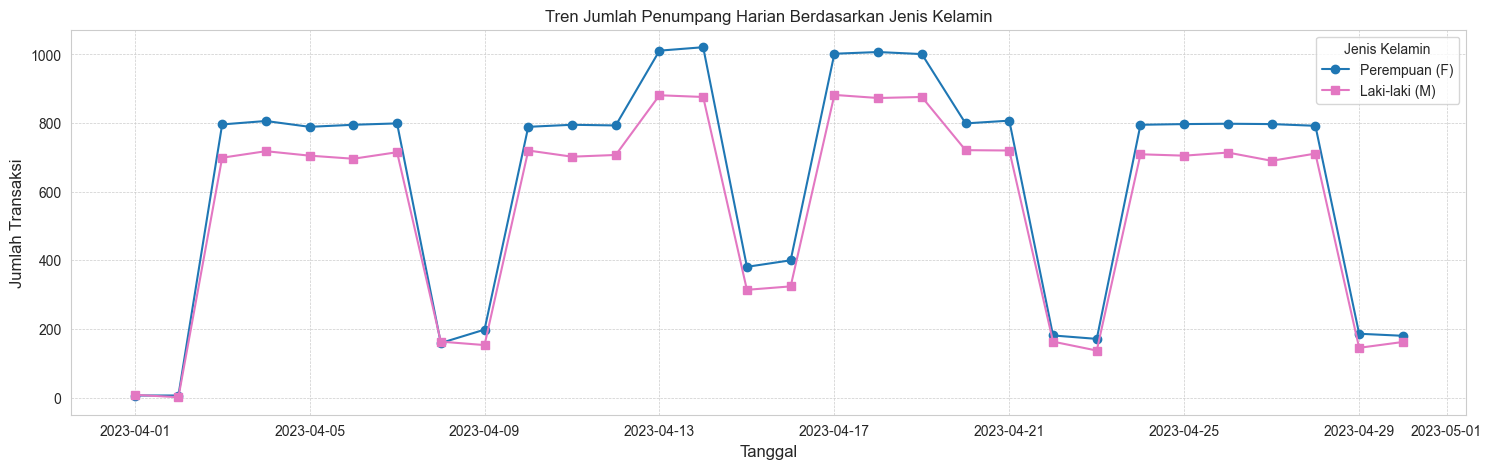

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Diasumsikan Anda menggunakan DataFrame 'df_analysis'
# Jika nama DataFrame Anda berbeda (misal: 'clean_df' atau 'df_gabungan'), silakan sesuaikan.

# ==============================================================================
# 1. PERBANDINGAN JUMLAH PENGGUNA M vs F (KESELURUHAN)
# ==============================================================================
print("--- 1. Perbandingan Jumlah Pengguna (M vs F) ---")

# Langsung hitung jumlah untuk setiap nilai di 'payCardSex'
gender_counts = clean_df['payCardSex'].value_counts()
print("Jumlah Pengguna berdasarkan payCardSex:")
print(gender_counts)

# Visualisasi dengan Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#1f77b4', '#e377c2']
)
# Tambahkan keterangan M/F pada judul
plt.title('Proporsi Pengguna Transjakarta (M: Laki-laki, F: Perempuan)', fontsize=16)
plt.ylabel('')
plt.show()


# ==============================================================================
# 2. RATA-RATA PENGGUNA PER KATEGORI WAKTU
# ==============================================================================
print("\n--- 2. Analisis Rata-Rata Pengguna per Kategori Waktu ---")

# Pastikan kolom tanggal sudah ada untuk grouping
if 'tanggal_transaksi' not in clean_df.columns:
    clean_df['tanggal_transaksi'] = pd.to_datetime(clean_df['tapInTime']).dt.date

daily_gender_time_counts = clean_df.groupby(['tanggal_transaksi', 'kelompok_hari', 'kelompok_jam', 'payCardSex']).size().reset_index(name='jumlah')
avg_counts = daily_gender_time_counts.groupby(['kelompok_hari', 'kelompok_jam', 'payCardSex'])['jumlah'].mean().round(0)

# Visualisasi Bar Plot
g = sns.catplot(
    data=avg_counts.reset_index(),
    x='kelompok_jam',
    y='jumlah',
    hue='payCardSex',
    col='kelompok_hari',
    kind='bar',
    height=6,
    aspect=1.2,
    palette={'F': '#1f77b4', 'M': '#e377c2'}
)
g.fig.suptitle('Rata-Rata Jumlah Pengguna (M: Laki-laki, F: Perempuan) per Kategori Waktu', y=1.03, fontsize=16)
g.set_axis_labels("Kelompok Jam", "Rata-Rata Jumlah Transaksi per Hari")
g.set_xticklabels(rotation=30)
g.set_titles("{col_name}")
g.legend.set_title('payCardSex') # Judul legenda menggunakan nama kolom asli
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# ==============================================================================
# 3. PERBANDINGAN TREN HARIAN PENGGUNA M vs. F
# ==============================================================================
print("\n--- 3. Perbandingan Tren Harian Pengguna (M vs F) ---")

# Hitung jumlah pengguna per hari untuk setiap gender
daily_gender_trend = clean_df.groupby(['tanggal_transaksi', 'payCardSex']).size().unstack(fill_value=0)

# Ganti nama kolom untuk legenda yang lebih jelas
daily_gender_trend_renamed = daily_gender_trend.rename(columns={'M': 'Laki-laki (M)', 'F': 'Perempuan (F)'})

# Visualisasi dengan Line Chart
daily_gender_trend_renamed.plot(
    kind='line',
    figsize=(18, 5),
    style=['-o', '-s'],
    color=['#1f77b4', '#e377c2'],
    title='Tren Jumlah Penumpang Harian Berdasarkan Jenis Kelamin'
)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Jenis Kelamin')
plt.show()

### Uji Statistik

#### Signifikansi Proporsi Gender Keseluruhan

* H0 (Hipotesis Nol): Tidak ada perbedaan signifikan antara jumlah pengguna Laki-laki dan Perempuan dari proporsi seimbang (50:50).
* H1 (Hipotesis Alternatif): Terdapat perbedaan yang signifikan (ada bias gender dalam penggunaan Transjakarta).

In [114]:
if 'payCardSex' in clean_df.columns:
    print("--- Uji Chi-Square untuk Proporsi Gender Keseluruhan ---")

    # Langkah 1: Dapatkan data observasi kita
    observed_counts = clean_df['payCardSex'].value_counts()
    print("Jumlah Observasi:")
    print(observed_counts)

    # Langkah 2: Tentukan data ekspektasi (jika 50:50)
    total_users = observed_counts.sum()
    expected_counts = [total_users / 2, total_users / 2]

    # Langkah 3: Lakukan uji Chi-Square Goodness of Fit
    chi2, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

    print(f"\nHasil Uji Chi-Square:")
    print(f"Chi2 Statistic = {chi2:.4f}")
    print(f"P-value = {p_value:.4f}")

    # Langkah 4: Interpretasi hasil
    alpha = 0.05
    if p_value < alpha:
        print(f"\nKesimpulan: P-value ({p_value:.4f}) lebih kecil dari {alpha}, maka kita TOLAK Hipotesis Nol.")
        print("✅ Proporsi pengguna Laki-laki dan Perempuan secara keseluruhan BERBEDA secara signifikan.")
    else:
        print(f"\nKesimpulan: P-value ({p_value:.4f}) lebih besar dari {alpha}, maka kita GAGAL MENOLAK Hipotesis Nol.")
        print("Tidak ada cukup bukti untuk menyatakan proporsi Laki-laki dan Perempuan berbeda signifikan dari 50:50.")

--- Uji Chi-Square untuk Proporsi Gender Keseluruhan ---
Jumlah Observasi:
payCardSex
F    18857
M    16590
Name: count, dtype: int64

Hasil Uji Chi-Square:
Chi2 Statistic = 144.9852
P-value = 0.0000

Kesimpulan: P-value (0.0000) lebih kecil dari 0.05, maka kita TOLAK Hipotesis Nol.
✅ Proporsi pengguna Laki-laki dan Perempuan secara keseluruhan BERBEDA secara signifikan.


#### Perbedaan Gender pada Jam Berangkat Kerja (Weekday)

In [115]:
if 'payCardSex' in clean_df.columns:
    print("\n--- Uji Mann-Whitney U untuk Jam Berangkat Kerja (Weekday) ---")

    # Langkah 1: Saring data untuk kondisi spesifik yang ingin diuji
    target_data = clean_df[
        (clean_df['kelompok_hari'] == 'Weekday') &
        (clean_df['kelompok_jam'] == 'Jam Berangkat Kerja')
    ]

    # Langkah 2: Siapkan sampel data untuk Laki-laki dan Perempuan
    daily_counts_target = target_data.groupby(['tanggal_transaksi', 'payCardSex']).size().unstack(fill_value=0)
    
    # Pastikan kedua kolom M dan F ada setelah di-unstack
    if 'M' in daily_counts_target.columns and 'F' in daily_counts_target.columns:
        male_counts = daily_counts_target['M']
        female_counts = daily_counts_target['F']

        # Langkah 3: Lakukan uji Mann-Whitney U
        statistic, p_value = stats.mannwhitneyu(male_counts, female_counts, alternative='two-sided')

        print(f"\nHasil Uji Mann-Whitney U:")
        print(f"Statistic = {statistic:.4f}")
        print(f"P-value = {p_value:.4f}")

        # Langkah 4: Interpretasi hasil
        alpha = 0.05
        if p_value < alpha:
            print(f"\nKesimpulan: P-value ({p_value:.4f}) lebih kecil dari {alpha}, maka kita TOLAK Hipotesis Nol.")
            print("✅ Jumlah penumpang Laki-laki dan Perempuan pada 'Jam Berangkat Kerja' di hari kerja BERBEDA secara signifikan.")
        else:
            print(f"\nKesimpulan: P-value ({p_value:.4f}) lebih besar dari {alpha}, maka kita GAGAL MENOLAK Hipotesis Nol.")
            print("Tidak ada cukup bukti untuk menyatakan ada perbedaan signifikan antara penumpang L/P pada slot waktu ini.")
    else:
        print("\nTidak cukup data untuk membandingkan Laki-laki dan Perempuan pada slot waktu ini.")


--- Uji Mann-Whitney U untuk Jam Berangkat Kerja (Weekday) ---

Hasil Uji Mann-Whitney U:
Statistic = 53.0000
P-value = 0.0001

Kesimpulan: P-value (0.0001) lebih kecil dari 0.05, maka kita TOLAK Hipotesis Nol.
✅ Jumlah penumpang Laki-laki dan Perempuan pada 'Jam Berangkat Kerja' di hari kerja BERBEDA secara signifikan.


### Insight:

Jika kita melihat dari 3 chart diatas, kita bisa menjawab pertanyaan awal untuk analisis transaksi :

* Berapa proporsi 'jenis kelamin' pengguna layanan Transjakarta?
    - Jumlah pengguna layanan mayoritas adalah perempuan (53,2%) dan laki--laki (46,8%)
* Apakah ada pola tertentu pada 'jenis kelamin' pengguna layanan di kelompok jam tertentu atau hari tertentu?
    - Proporsi pengguna layanan bisa berubah jika melihat kelompok jam, tetapi jumlah pengguna layanan perempuan selalu lebih tinggi. Pola yang sama ditemukan juga pada weekdays dan weekend.
* Apakah ada pola tertentu pada 'jenis kelamin' pengguna layanan di tanggal tertentu?
    - Proporsi pengguna layanan dalam sudut pandang hari (dalam bulan april) juga memiliki hasil yang bisa dikatakan sama, karena hanya pada tanggal 1 dan 8 pengguna layanan lebih banyak laki-laki (dimana selisih jumlah pengguna layanan tidak terlalu jauh)

Informasi ini divalidasi dari uji statistik yang dilakukan, sehingga dapat ditarik kesimpulan memang jumlah pengguna layanan transjakarta memang didominasi oleh perempuan dari semua timeframe yang kita analisa

------------------------------------------------------------

## Analisis Waktu Sibuk

Pada analisa ini akan dilakukan perbandingan data yang berkaitan dengan waktu (tapInTime dan tapOutTime) dan features yang dikembangkan dari 2 data tersebut. Analisa dilakukan untuk melihat adanya pola atau kecenderungan pada waktu-waktu tertentu dan melihat apakah fasilitas yang diberikan sudah tepat sasaran. Analisa perlu dilakukan dengan hati-hati karena secara keseluruhan Transjakarta memiliki 3 layanan.

Pada analisa ini, diharapkan akan menjawab pertanyaan berikut:
* Pada jam berapa layanan transjakarta sibuk? 
* Pada hari apakah layanan transajakarta sibuk?
* Apakah ada hari-hari tertentu dengan anomali jumlah transaksi?

### Analisis Jam Sibuk

In [116]:
df = clean_df.copy()

print("--- Langkah 1: Menghitung jumlah transaksi per kelompok waktu ---")

# Kelompokkan data berdasarkan 'kelompok_hari' dan 'kelompok_jam'
# .size() akan menghitung jumlah baris (transaksi) di setiap kelompok
# .reset_index() mengubah hasil menjadi DataFrame yang rapi
peak_hour_summary = clean_df.groupby(['kelompok_hari', 'kelompok_jam']).size().reset_index(name='jumlah_transaksi')

# Mengatasi kemungkinan kategori yang tidak terpakai agar tidak muncul di tabel
peak_hour_summary = peak_hour_summary[peak_hour_summary['jumlah_transaksi'] > 0].sort_values(by= 'jumlah_transaksi', ascending= False)

print("Tabel Agregasi Data:")
display(peak_hour_summary)

--- Langkah 1: Menghitung jumlah transaksi per kelompok waktu ---
Tabel Agregasi Data:


,kelompok_hari,kelompok_jam,jumlah_transaksi
3,Weekday,Jam Pulang Kerja,15864
1,Weekday,Jam Berangkat Kerja,13084
2,Weekday,Jam Kerja,3061
6,Weekend,Jam Kerja,1365
7,Weekend,Jam Pulang Kerja,1254
5,Weekend,Jam Berangkat Kerja,819


In [117]:
print("\n--- Langkah 2: Membuat tabel pivot untuk perbandingan ---")

# Buat tabel pivot dengan jam sebagai baris dan kelompok hari sebagai kolom
peak_hour_pivot = peak_hour_summary.pivot_table(
    index='kelompok_hari',
    columns='kelompok_jam',
    values='jumlah_transaksi',
    fill_value=0 # Isi 0 jika tidak ada transaksi pada kombinasi tertentu
)

print("Tabel Perbandingan Weekday vs. Weekend:")
display(peak_hour_pivot)


--- Langkah 2: Membuat tabel pivot untuk perbandingan ---
Tabel Perbandingan Weekday vs. Weekend:


kelompok_jam,Jam Berangkat Kerja,Jam Kerja,Jam Pulang Kerja
kelompok_hari,,,
Weekday,13084.0,3061.0,15864.0
Weekend,819.0,1365.0,1254.0



--- Langkah 3: Membuat visualisasi perbandingan ---


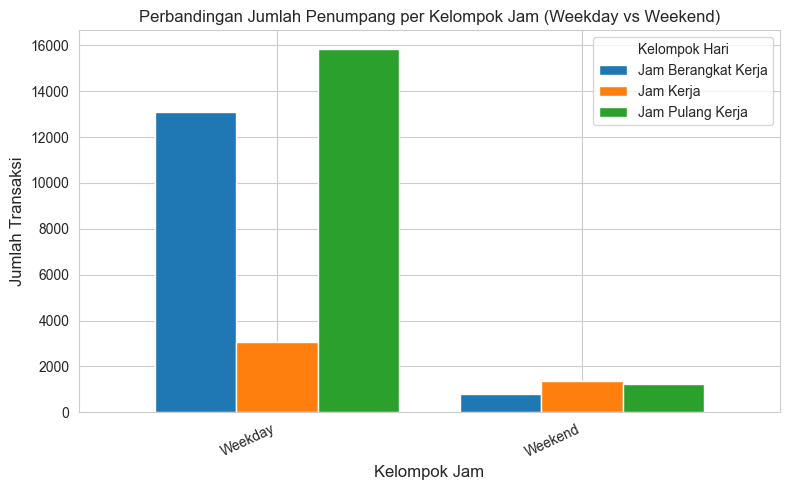

In [118]:
print("\n--- Langkah 3: Membuat visualisasi perbandingan ---")

# Atur style visualisasi
sns.set_style("whitegrid")

# Buat bar chart dari tabel pivot
ax = peak_hour_pivot.plot(
    kind='bar',
    figsize=(8, 5),
    width=0.8, # Atur lebar bar
    title='Perbandingan Jumlah Penumpang per Kelompok Jam (Weekday vs Weekend)'
)

# Atur label dan judul
plt.xlabel("Kelompok Jam", fontsize=12)
plt.ylabel("Jumlah Transaksi", fontsize=12)
plt.xticks(rotation=25, ha='right') # Putar label x agar tidak tumpang tindih
plt.legend(title='Kelompok Hari')
plt.tight_layout() # Rapikan layout

# Tampilkan plot
plt.show()

### Analisis Hari Sibuk

--- Menganalisis Pola Harian Khusus Weekdays ---
Menganalisis 32009 transaksi pada hari kerja (Weekday).

Jumlah transaksi per hari (diurutkan):
nama_hari
Senin     6392
Selasa    6403
Rabu      6383
Kamis     6390
Jumat     6441
Name: count, dtype: int64

Membuat visualisasi...


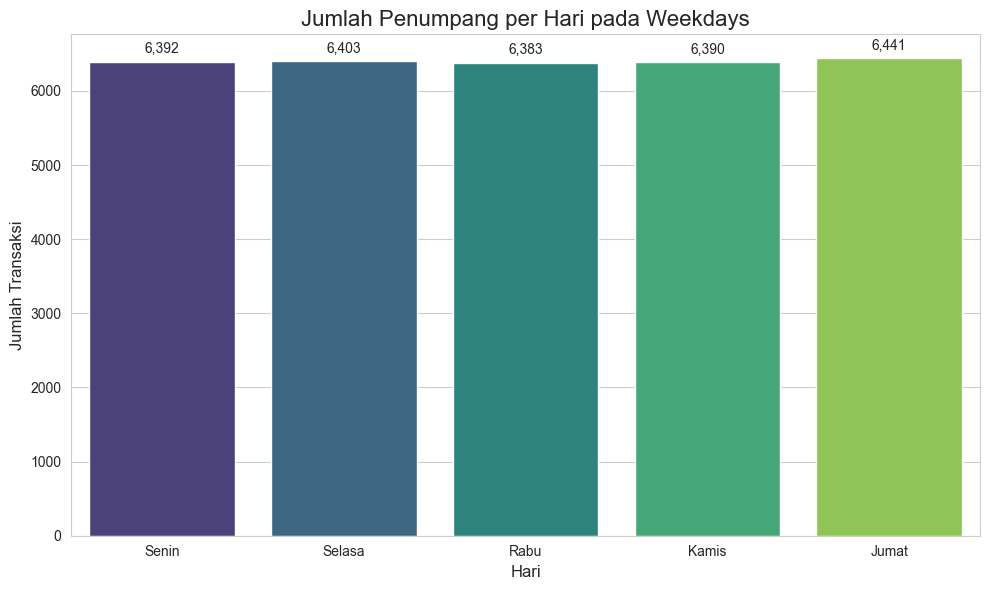

In [119]:
# Diasumsikan Anda ingin melanjutkan analisis pada DataFrame 'df' (hasil gabungan).
# Jika nama DataFrame Anda berbeda, silakan sesuaikan.

print("--- Menganalisis Pola Harian Khusus Weekdays ---")

# Langkah 1: Saring data untuk hanya menyertakan 'Weekday'
df_weekdays = clean_df[clean_df['kelompok_hari'] == 'Weekday'].copy()
print(f"Menganalisis {len(df_weekdays)} transaksi pada hari kerja (Weekday).")

# Langkah 2: Hitung jumlah transaksi untuk setiap hari
daily_counts = df_weekdays['nama_hari'].value_counts()

# Langkah 3: Urutkan hasilnya berdasarkan urutan hari yang benar (Senin -> Jumat)
# Ini penting agar visualisasi lebih mudah dibaca dan tidak acak.
day_order = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat']
daily_counts_sorted = daily_counts.reindex(day_order)

print("\nJumlah transaksi per hari (diurutkan):")
print(daily_counts_sorted)


# Langkah 4: Visualisasi
print("\nMembuat visualisasi...")
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Buat bar plot dengan Seaborn untuk tampilan yang lebih menarik
ax = sns.barplot(
    x=daily_counts_sorted.index,
    y=daily_counts_sorted.values,
    palette="viridis" # Anda bisa ganti palet warna lain seperti "plasma" atau "magma"
)

# Atur judul dan label
ax.set_title('Jumlah Penumpang per Hari pada Weekdays', fontsize=16)
ax.set_xlabel('Hari', fontsize=12)
ax.set_ylabel('Jumlah Transaksi', fontsize=12)

# Tambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', # Format angka dengan pemisah ribuan
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=10)


plt.tight_layout()
plt.show()

### Analisis Tanggal Sibuk

In [120]:
clean_df.head(3)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tanggal,nama_hari,kelompok_hari,durasi_menit,jam_keberangkatan,kelompok_jam,Service,tanggal_transaksi
0,LZFD368Q3E81HJ,4056836188316,online,Nadine Utami,M,1970-01-01 00:00:00.000001975,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00608P,Gelanggang Remaja Pasar Minggu,-6.284615,106.83787,5,2023-04-03 05:38:44,B01062P,Jln. Gabus Raya,-6.301222,106.83623,17.0,2023-04-03 06:09:17,0.0,3,Senin,Weekday,30.550000,5,Jam Berangkat Kerja,Jaklingko,2023-04-03
1,ZYRL615G4C05RD,5430018591726410,dki,Karna Waskita,M,1970-01-01 00:00:00.000001981,JAK.88,Terminal Tanjung Priok - Ancol Barat,0.0,B00722P,Gunung Sahari Mangga Dua Timur,-6.137032,106.83254,20,2023-04-03 06:43:49,B05989P,Jln. Ancol Barat 6,-6.124810,106.81983,36.0,2023-04-03 07:30:45,0.0,3,Senin,Weekday,46.933333,6,Jam Berangkat Kerja,Jaklingko,2023-04-03
2,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1970-01-01 00:00:00.000001997,JAK.16,Cililitan - Condet,0.0,B02144P,Lippo Mall Kramat Jati,-6.270835,106.86741,4,2023-04-03 05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.85293,20.0,2023-04-03 05:30:45,0.0,3,Senin,Weekday,22.150000,5,Jam Berangkat Kerja,Jaklingko,2023-04-03



Membuat visualisasi...


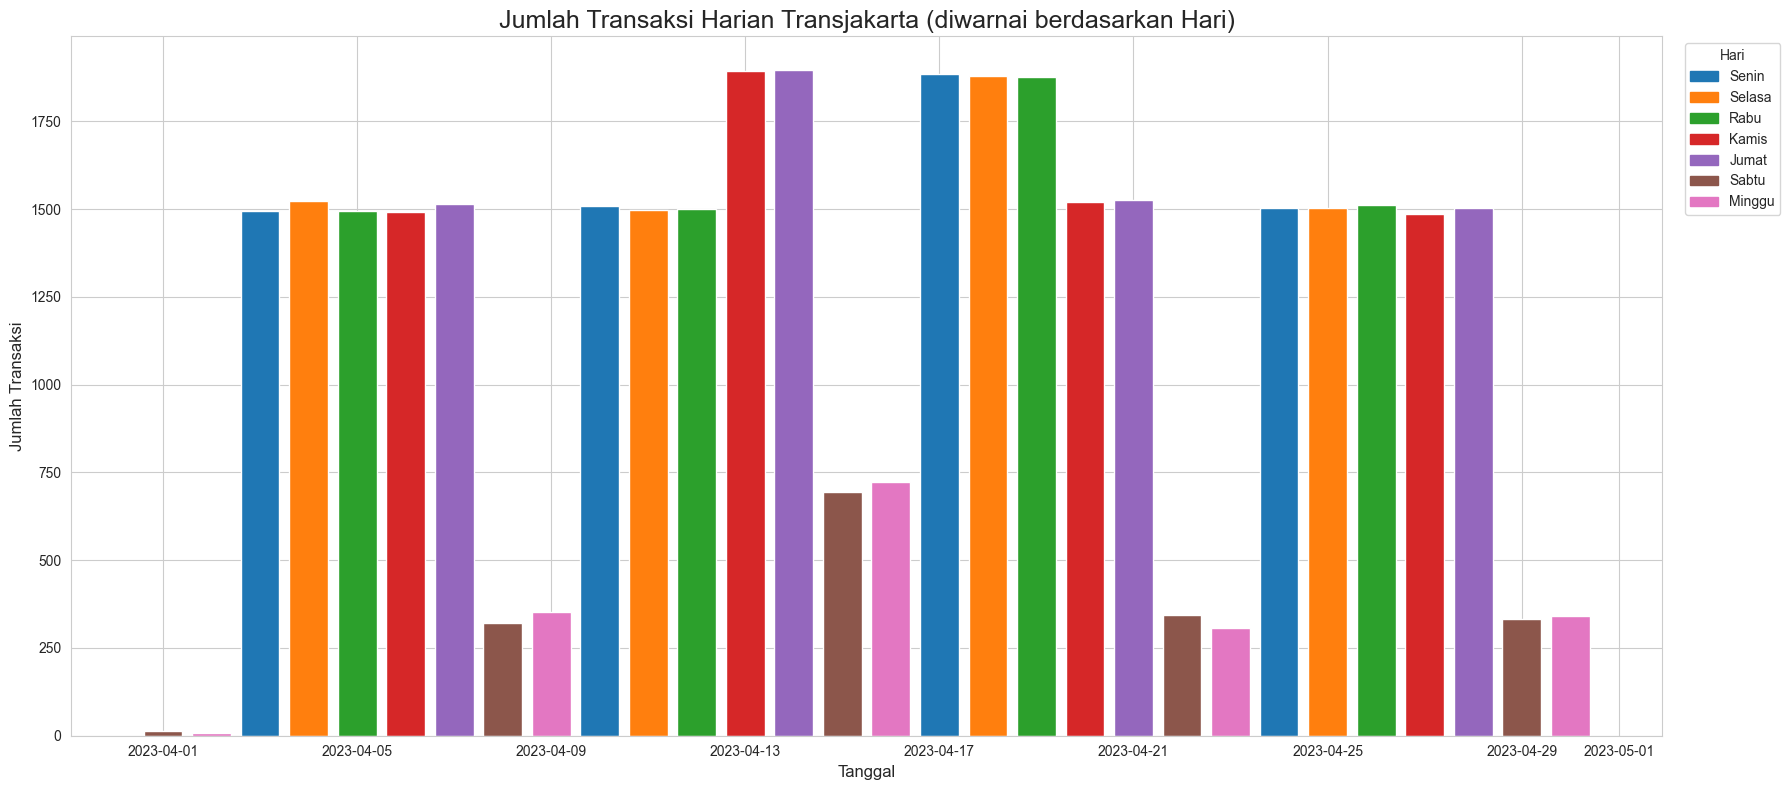

In [121]:
import matplotlib.patches as mpatches 
# Langkah 1: Hitung jumlah transaksi dan urutkan berdasarkan tanggal
# Pastikan kolom 'tapInTime' sudah berformat datetime
clean_df['tanggal_transaksi'] = pd.to_datetime(clean_df['tapInTime'].dt.date)
daily_counts = clean_df['tanggal_transaksi'].value_counts().sort_index()

# Ubah Series menjadi DataFrame untuk memudahkan penambahan kolom baru
daily_summary = daily_counts.reset_index()
daily_summary.columns = ['tanggal', 'jumlah_transaksi']

# Langkah 2: Tambahkan kolom 'nama_hari' ke tabel ringkasan kita
hari_map = {
    0: 'Senin',
    1: 'Selasa',
    2: 'Rabu',
    3: 'Kamis',
    4: 'Jumat',
    5: 'Sabtu',
    6: 'Minggu'
}
daily_summary['nama_hari'] = daily_summary['tanggal'].dt.dayofweek.map(hari_map)

# Langkah 3: Buat palet warna untuk setiap hari
color_map = {
    'Senin': '#1f77b4',  # Biru
    'Selasa': '#ff7f0e', # Oranye
    'Rabu': '#2ca02c',   # Hijau
    'Kamis': '#d62728',  # Merah
    'Jumat': '#9467bd',  # Ungu
    'Sabtu': '#8c564b',  # Coklat
    'Minggu': '#e377c2'  # Pink
}
# Buat list warna sesuai urutan data di tabel ringkasan
bar_colors = daily_summary['nama_hari'].map(color_map)

# Langkah 4: Visualisasi dengan Bar Chart dan warna kustom
print("\nMembuat visualisasi...")
plt.figure(figsize=(20, 8)) # Ukuran gambar dibuat lebih besar
sns.set_style("whitegrid")

# Gunakan plt.bar yang lebih fleksibel untuk pewarnaan kustom
plt.bar(daily_summary['tanggal'], daily_summary['jumlah_transaksi'], color=bar_colors)

# Atur judul dan label
plt.title('Jumlah Transaksi Harian Transjakarta (diwarnai berdasarkan Hari)', fontsize=18)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)

# Membuat legenda kustom
legend_patches = [mpatches.Patch(color=color, label=day) for day, color in color_map.items()]
plt.legend(handles=legend_patches, title='Hari', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.9, 1]) # Atur layout agar legenda tidak terpotong
plt.show()

### Uji Statistik

Pada analisi ini tidak dilakukan uji normalitasa karena data yag sedang dianalisis berkaitan dengan jumlah transaksi (data hitungan) yang seringkali tidak terdistribusi normal. Melakukan uji normalitas akan sangat sensitif terhadap sedikit penyimpangan yang terjadi

#### Signifikansi Antar Hari (Weekdays)

* H0 (Hipotesis Nol): Tidak ada perbedaan signifikan dalam distribusi jumlah penumpang harian antara hari Senin, Selasa, Rabu, Kamis, dan Jumat. (Perbedaan yang terlihat di grafik hanya kebetulan).
* H1 (Hipotesis Alternatif): Setidaknya ada satu hari yang distribusinya berbeda secara signifikan dari yang lain.

In [122]:
print("--- Uji Kruskal-Wallis untuk Perbedaan Antar Hari (Weekday) ---")

# Langkah 1: Siapkan data. Kita butuh daftar jumlah penumpang harian untuk setiap hari.
# df_weekdays sudah kita buat di analisis sebelumnya.
df_daily_counts_weekday = df_weekdays.groupby('tanggal')['nama_hari'].first().reset_index(name='nama_hari')
df_daily_counts_weekday['jumlah'] = df_weekdays.groupby('tanggal').size().values

# Buat list data untuk setiap hari
senin_counts = df_daily_counts_weekday[df_daily_counts_weekday['nama_hari'] == 'Senin']['jumlah']
selasa_counts = df_daily_counts_weekday[df_daily_counts_weekday['nama_hari'] == 'Selasa']['jumlah']
rabu_counts = df_daily_counts_weekday[df_daily_counts_weekday['nama_hari'] == 'Rabu']['jumlah']
kamis_counts = df_daily_counts_weekday[df_daily_counts_weekday['nama_hari'] == 'Kamis']['jumlah']
jumat_counts = df_daily_counts_weekday[df_daily_counts_weekday['nama_hari'] == 'Jumat']['jumlah']

# Langkah 2: Lakukan uji Kruskal-Wallis
# Kita membuang list hari yang kosong jika ada (misal data tidak mencakup hari jumat sama sekali)
valid_days_data = [d for d in [senin_counts, selasa_counts, rabu_counts, kamis_counts, jumat_counts] if not d.empty]

if len(valid_days_data) > 1:
    statistic, p_value = stats.kruskal(*valid_days_data)

    print(f"\nHasil Uji Kruskal-Wallis:")
    print(f"Statistic = {statistic:.4f}")
    print(f"P-value = {p_value:.4f}")

    # Langkah 3: Interpretasi hasil
    alpha = 0.05  # Tingkat signifikansi umum
    if p_value < alpha:
        print(f"\nKesimpulan: P-value ({p_value:.4f}) lebih kecil dari {alpha}, maka kita TOLAK Hipotesis Nol.")
        print("✅ Ini berarti, ada perbedaan yang signifikan secara statistik dalam jumlah penumpang antar hari kerja.")
    else:
        print(f"\nKesimpulan: P-value ({p_value:.4f}) lebih besar dari {alpha}, maka kita GAGAL MENOLAK Hipotesis Nol.")
        print("Ini berarti, tidak ada cukup bukti statistik untuk mengatakan ada perbedaan signifikan antar hari kerja.")
else:
    print("\nTidak cukup data hari yang berbeda untuk dilakukan perbandingan.")

--- Uji Kruskal-Wallis untuk Perbedaan Antar Hari (Weekday) ---

Hasil Uji Kruskal-Wallis:
Statistic = 1.8286
P-value = 0.7673

Kesimpulan: P-value (0.7673) lebih besar dari 0.05, maka kita GAGAL MENOLAK Hipotesis Nol.
Ini berarti, tidak ada cukup bukti statistik untuk mengatakan ada perbedaan signifikan antar hari kerja.


#### Signifikansi Antar Hari (Weekend)

--- Uji Mann-Whitney U untuk Perbedaan Antar Hari (Weekend) ---

Hasil Uji Mann-Whitney U:
Statistic = 12.0000
P-value = 1.0000

Kesimpulan: P-value (1.0000) lebih besar dari 0.05, maka kita GAGAL MENOLAK Hipotesis Nol.
Ini berarti, tidak ada cukup bukti statistik untuk mengatakan ada perbedaan signifikan antara keramaian hari Sabtu dan Minggu.


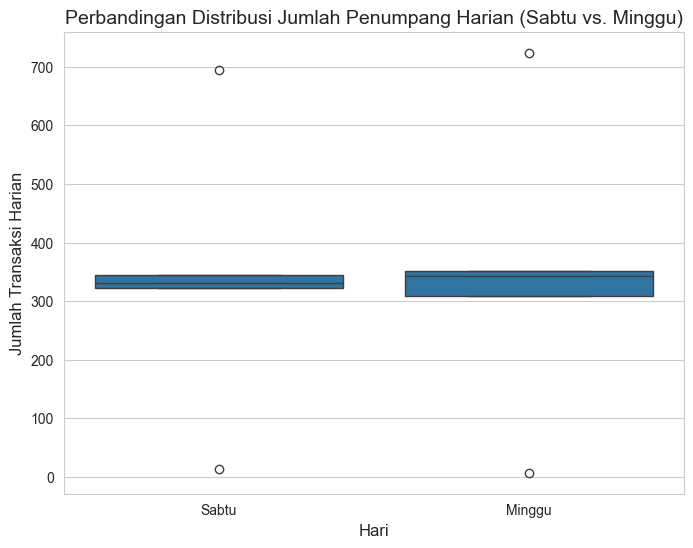

In [123]:
print("--- Uji Mann-Whitney U untuk Perbedaan Antar Hari (Weekend) ---")

# Langkah 1: Saring data untuk hanya menyertakan 'Weekend'
df_weekend = clean_df[clean_df['kelompok_hari'] == 'Weekend'].copy()

if df_weekend.empty:
    print("Tidak ditemukan data untuk akhir pekan (Weekend).")
else:
    # Langkah 2: Siapkan data. Kita butuh daftar jumlah penumpang harian untuk Sabtu dan Minggu.
    # Pastikan kolom 'tanggal_transaksi' sudah dibuat dari langkah analisis sebelumnya.
    if 'tanggal_transaksi' not in df_weekend.columns:
        df_weekend['tanggal_transaksi'] = pd.to_datetime(df_weekend['tapInTime'].dt.date)
        
    df_daily_counts_weekend = df_weekend.groupby(['tanggal_transaksi', 'nama_hari']).size().reset_index(name='jumlah')

    # Buat list data untuk setiap hari
    sabtu_counts = df_daily_counts_weekend[df_daily_counts_weekend['nama_hari'] == 'Sabtu']['jumlah']
    minggu_counts = df_daily_counts_weekend[df_daily_counts_weekend['nama_hari'] == 'Minggu']['jumlah']

    # Lakukan pengecekan apakah kita punya data untuk kedua hari
    if not sabtu_counts.empty and not minggu_counts.empty:
        # Langkah 3: Lakukan uji Mann-Whitney U
        statistic, p_value = stats.mannwhitneyu(sabtu_counts, minggu_counts, alternative='two-sided')

        print(f"\nHasil Uji Mann-Whitney U:")
        print(f"Statistic = {statistic:.4f}")
        print(f"P-value = {p_value:.4f}")

        # Langkah 4: Interpretasi hasil
        alpha = 0.05  # Tingkat signifikansi
        if p_value < alpha:
            print(f"\nKesimpulan: P-value ({p_value:.4f}) lebih kecil dari {alpha}, maka kita TOLAK Hipotesis Nol.")
            print("✅ Ini berarti, ada perbedaan yang signifikan secara statistik dalam jumlah penumpang antara hari Sabtu dan Minggu.")
        else:
            print(f"\nKesimpulan: P-value ({p_value:.4f}) lebih besar dari {alpha}, maka kita GAGAL MENOLAK Hipotesis Nol.")
            print("Ini berarti, tidak ada cukup bukti statistik untuk mengatakan ada perbedaan signifikan antara keramaian hari Sabtu dan Minggu.")

        # Langkah 5 (Opsional): Visualisasi perbandingan dengan Box Plot
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df_daily_counts_weekend, x='nama_hari', y='jumlah', order=['Sabtu', 'Minggu'])
        plt.title('Perbandingan Distribusi Jumlah Penumpang Harian (Sabtu vs. Minggu)', fontsize=14)
        plt.xlabel('Hari', fontsize=12)
        plt.ylabel('Jumlah Transaksi Harian', fontsize=12)
        plt.show()

    else:
        print("\nTidak cukup data untuk membandingkan hari Sabtu dan Minggu (salah satu atau kedua hari tidak memiliki data).")

#### Hubungan Tipe Hari dengan Pola Jam Sibuk

* H0 (Hipotesis Nol): Tidak ada hubungan (asosiasi) antara tipe hari (Weekday/Weekend) dan distribusi penumpang berdasarkan kelompok jam. Keduanya adalah variabel yang independen.
* H1 (Hipotesis Alternatif): Terdapat hubungan antara tipe hari dan distribusi penumpang. (Pola jam sibuk di hari kerja berbeda dengan di akhir pekan).

In [124]:
print("\n--- Uji Chi-Square untuk Hubungan Tipe Hari dan Pola Jam Sibuk ---")

# Langkah 1: Siapkan data. Kita akan gunakan tabel pivot yang sudah kita buat sebelumnya.
# Tabel ini disebut juga "Contingency Table" atau "Tabel Kontingensi".
# peak_hour_pivot sudah kita buat di analisis jam sibuk.
print("Tabel Kontingensi yang diuji:")
display(peak_hour_pivot)

# Langkah 2: Lakukan uji Chi-Square
chi2, p_value, dof, expected = stats.chi2_contingency(peak_hour_pivot)

print(f"\nHasil Uji Chi-Square:")
print(f"Chi2 Statistic = {chi2:.4f}")
print(f"P-value = {p_value:.4f}")
print(f"Degrees of Freedom = {dof}")

# Langkah 3: Interpretasi hasil
alpha = 0.05
if p_value < alpha:
    print(f"\nKesimpulan: P-value ({p_value:.4f}) lebih kecil dari {alpha}, maka kita TOLAK Hipotesis Nol.")
    print("✅ Ini berarti, ada hubungan yang signifikan secara statistik antara tipe hari (Weekday/Weekend) dan pola jam sibuk.")
else:
    print(f"\nKesimpulan: P-value ({p_value:.4f}) lebih besar dari {alpha}, maka kita GAGAL MENOLAK Hipotesis Nol.")
    print("Ini berarti, tidak ada cukup bukti statistik untuk mengatakan pola jam sibuk bergantung pada tipe harinya.")


--- Uji Chi-Square untuk Hubungan Tipe Hari dan Pola Jam Sibuk ---
Tabel Kontingensi yang diuji:


kelompok_jam,Jam Berangkat Kerja,Jam Kerja,Jam Pulang Kerja
kelompok_hari,,,
Weekday,13084.0,3061.0,15864.0
Weekend,819.0,1365.0,1254.0



Hasil Uji Chi-Square:
Chi2 Statistic = 2599.0316
P-value = 0.0000
Degrees of Freedom = 2

Kesimpulan: P-value (0.0000) lebih kecil dari 0.05, maka kita TOLAK Hipotesis Nol.
✅ Ini berarti, ada hubungan yang signifikan secara statistik antara tipe hari (Weekday/Weekend) dan pola jam sibuk.


### Insight :

Pada proses analisa dan uji statistik yang sudah dilakukan, maka dapat menjawab pertanyaan berikut:

* Pada hari apakah layanan transajakarta sibuk?
    - Layanan transjakarta terlihat sibuk pada hari kerja, dimana tidak ada perbedaan ekstrim jika membandingkan hari senin s.d jumat. Hal ini didukung juga memalui uji statistik 'Signifikansi Antar Hari (Weekdays)'

* Pada jam berapa layanan transjakarta sibuk? 
    - Pada weekdays atau hari kerja pola transaksi berfokus pada jam dimana mobilitas pekerja (berangkat dan pulang)
    - Pada weekend atau hari libur pola transaksi berfokus pada jam dimana peningkatan aktivitas terjadi (rekreasi atau jalan-jalan)

* Apakah ada hari-hari tertentu dengan anomali jumlah transaksi?
    * Weekdays:
        - pola hari terjadi anomali di tanggal 13-14 dan 17-20 dimana belum dapat disimpulkan penyebab adanya lonjakan transaksi tersebut. Tetapi memalui pendekatan statistik hal ini tidak dinyatakan sebagai anomali, yang mana hasilnya tidak signifikan
        - untuk hari lainnya jumlah transaksi terlihat cenderung konstan, tapi jika diamati lebih lanjut hari kamis selalu lebih rendah dari jumat (6-7, 20-21, 27-28)

    * Weekend:
        - pola yang terlihat adanya kecenderungan peningakatan jumlah transaksi menuju pertengahan bulan (puncak jumlah transaksi) dan penurunan terjadi sampai akhir bulan.

---------------

## Analisis Layanan

Analisa ini adalah bentuk analisa lanjutan dari analisa Waktu Sibuk. Pada analisa ini kita akan melihat apakah ada pola tertentu pada kategori layanan berdasarkan nama hari dan kelompok jamnya.

Pada analisa ini, diharapkan akan menjawab pertanyaan berikut:
* Proporsi layanan transjakarta pada keseluruhan transaksi? 
* Apakah terdapat anomali pada kategori layanan yang diberikan pada hari-hari tertentu?
* Apakah terdapat perbedaan durasi antar kategori layanan?

--- 1. Analisis Proporsi Pengguna per Kategori Service ---


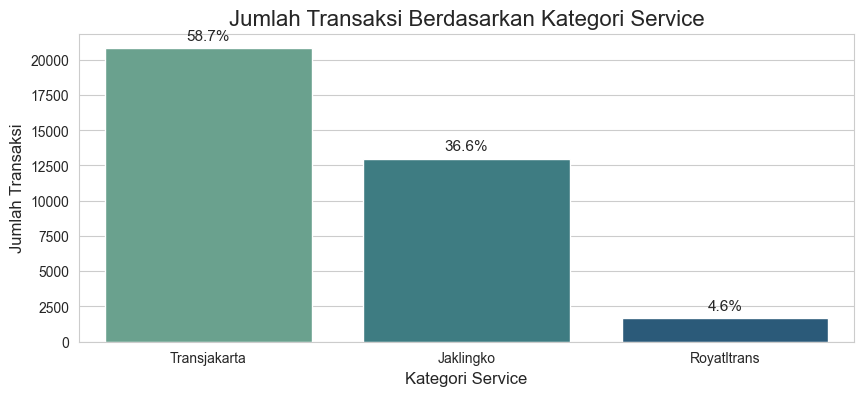

In [125]:
# Pastikan kode ini dijalankan hanya jika kolom 'service' ada
if 'Service' in clean_df.columns:
    print("--- 1. Analisis Proporsi Pengguna per Kategori Service ---")

    # Hitung jumlah transaksi untuk setiap service
    service_counts = clean_df['Service'].value_counts()

    # Visualisasi dengan Bar Chart
    plt.figure(figsize=(10, 4))
    sns.set_style("whitegrid")
    ax = sns.barplot(
        x=service_counts.index,
        y=service_counts.values,
        palette="crest"
    )
    
    ax.set_title('Jumlah Transaksi Berdasarkan Kategori Service', fontsize=16)
    ax.set_xlabel('Kategori Service', fontsize=12)
    ax.set_ylabel('Jumlah Transaksi', fontsize=12)

    # Tambahkan label persentase di atas setiap bar
    total = service_counts.sum()
    for p in ax.patches:
        percentage = f'{(p.get_height()/total)*100:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=11)

    plt.show()


--- 2. Analisis Pola Mingguan per Kategori Service ---
Tabel Pola Mingguan per Service:


nama_hari,Senin,Selasa,Rabu,Kamis,Jumat,Sabtu,Minggu
Service,,,,,,,
Jaklingko,2339,2338,2332,2339,2336,629,672
Royatltrans,300,302,301,302,302,65,74
Transjakarta,3753,3763,3750,3749,3803,1012,986


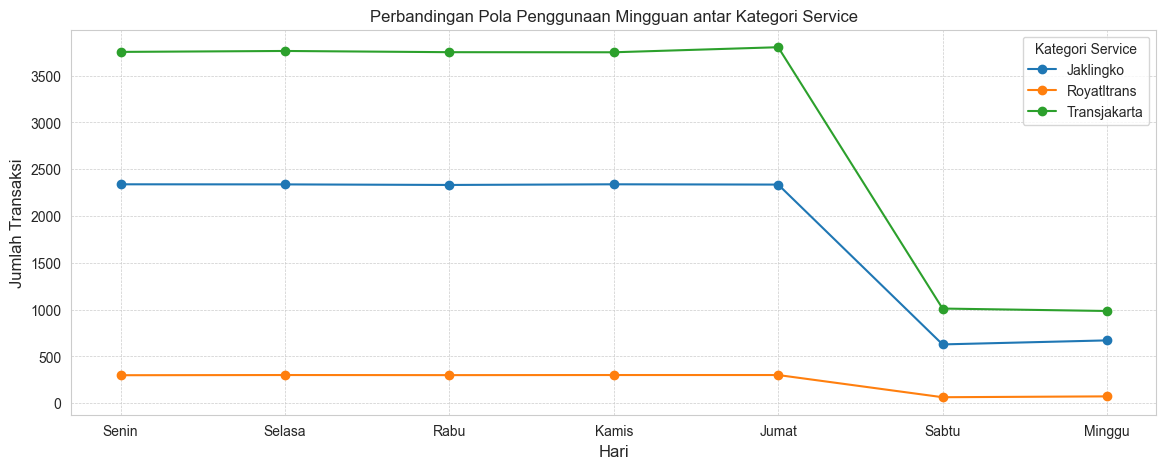

In [126]:
if 'Service' in clean_df.columns:
    print("\n--- 2. Analisis Pola Mingguan per Kategori Service ---")

    # Kelompokkan data berdasarkan service dan nama hari, lalu hitung jumlahnya
    service_daily_pattern = clean_df.groupby(['Service', 'nama_hari']).size().unstack(fill_value=0)
    
    # Urutkan kolom hari agar sesuai (Senin -> Minggu)
    day_order = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
    service_daily_pattern = service_daily_pattern.reindex(columns=day_order)

    print("Tabel Pola Mingguan per Service:")
    display(service_daily_pattern)

    # Visualisasi dengan Line Chart untuk membandingkan tren
    service_daily_pattern.T.plot( # Kita transpose (.T) agar hari di sumbu X
        kind='line',
        figsize=(14, 5),
        style='-o',
        title='Perbandingan Pola Penggunaan Mingguan antar Kategori Service'
    )
    
    plt.xlabel('Hari', fontsize=12)
    plt.ylabel('Jumlah Transaksi', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(title='Kategori Service')
    plt.show()


--- 3. Analisis Karakteristik Perjalanan per Service ---


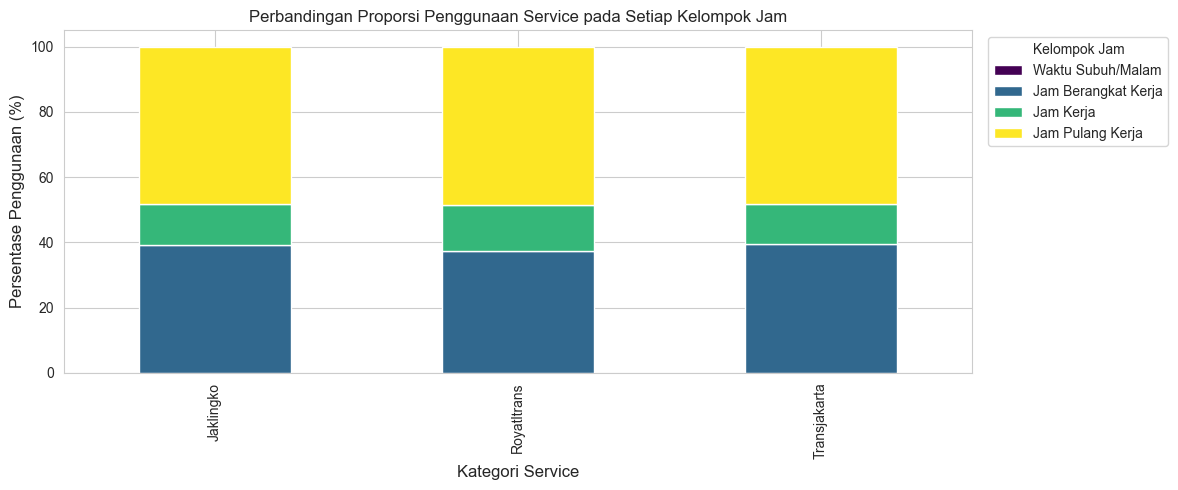

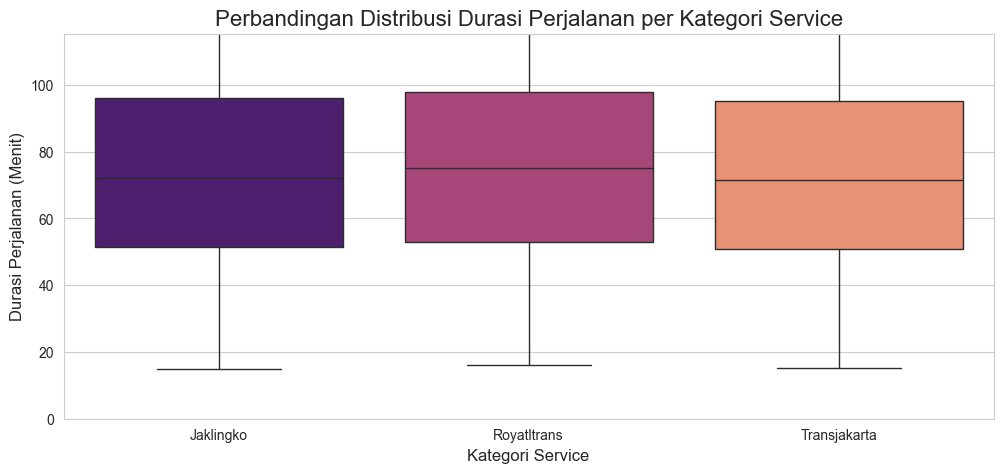

In [127]:
if 'Service' in clean_df.columns:
    print("\n--- 3. Analisis Karakteristik Perjalanan per Service ---")

    # --- Analisis A: Perbandingan Pola Jam Sibuk ---
    service_hourly_pattern = clean_df.groupby(['Service', 'kelompok_jam']).size().unstack(fill_value=0)
    # Hitung persentase untuk perbandingan yang adil (normalisasi per baris)
    service_hourly_percentage = service_hourly_pattern.div(service_hourly_pattern.sum(axis=1), axis=0) * 100

    # Visualisasi Pola Jam Sibuk
    service_hourly_percentage.plot(
        kind='bar',
        stacked=True, # Gunakan stacked bar chart untuk melihat proporsi
        figsize=(14, 5),
        colormap='viridis',
        title='Perbandingan Proporsi Penggunaan Service pada Setiap Kelompok Jam'
    )
    plt.xlabel('Kategori Service', fontsize=12)
    plt.ylabel('Persentase Penggunaan (%)', fontsize=12)
    plt.legend(title='Kelompok Jam', bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

    # --- Analisis B: Perbandingan Durasi Perjalanan ---
    plt.figure(figsize=(12, 5))
    sns.boxplot(
        x='Service',
        y='durasi_menit',
        data=clean_df,
        palette='magma'
    )
    plt.title('Perbandingan Distribusi Durasi Perjalanan per Kategori Service', fontsize=16)
    plt.xlabel('Kategori Service', fontsize=12)
    plt.ylabel('Durasi Perjalanan (Menit)', fontsize=12)
    # Batasi sumbu y untuk visualisasi yang lebih baik jika ada outliers ekstrim
    plt.ylim(0, clean_df['durasi_menit'].quantile(0.95)) # Tampilkan hingga persentil ke-95
    plt.show()

### Uji Statistik

#### Signifikansi Proporsi Kategori Service

* H0 (Nol): Distribusi penggunaan service tidak berbeda signifikan dari distribusi yang seragam/merata.
* H1 (Alternatif): Distribusi penggunaan service berbeda signifikan (ada layanan yang lebih populer dari yang lain).

In [128]:
if 'Service' in clean_df.columns:
    print("--- Uji Chi-Square Goodness of Fit untuk Proporsi Service ---")

    # Data observasi kita
    observed_counts = clean_df['Service'].value_counts()
    
    # Uji ini secara default membandingkan dengan distribusi yang merata
    chi2, p_value = stats.chisquare(f_obs=observed_counts)

    print(f"\nHasil Uji:")
    print(f"Chi2 Statistic = {chi2:.4f}, P-value = {p_value:.4f}")

    # Interpretasi
    alpha = 0.05
    if p_value < alpha:
        print("\nKesimpulan: P-value < 0.05. Kita TOLAK Hipotesis Nol.")
        print("✅ Ini berarti, proporsi penggunaan antar kategori service BERBEDA secara signifikan.")
    else:
        print("\nKesimpulan: P-value >= 0.05. Kita GAGAL MENOLAK Hipotesis Nol.")

--- Uji Chi-Square Goodness of Fit untuk Proporsi Service ---

Hasil Uji:
Chi2 Statistic = 15724.5009, P-value = 0.0000

Kesimpulan: P-value < 0.05. Kita TOLAK Hipotesis Nol.
✅ Ini berarti, proporsi penggunaan antar kategori service BERBEDA secara signifikan.


#### Hubungan Antara Service dengan Pola Waktu

Kita bisa menguji kedua hal ini dengan uji yang sama (Chi-Square of Independence) pada tabel kontingensi yang berbeda.

In [129]:
if 'Service' in clean_df.columns:
    # --- Uji untuk Pola Harian (nama_hari) ---
    print("\n--- Uji Chi-Square: Hubungan Service dengan Hari Penggunaan ---")
    # Buat tabel kontingensi (crosstab)
    contingency_table_daily = pd.crosstab(clean_df['Service'], clean_df['nama_hari'])
    
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table_daily)
    print(f"Hasil Uji (Service vs Hari): P-value = {p_val:.4f}")
    if p_val < 0.05:
        print("✅ Kesimpulan: Ada hubungan signifikan antara jenis service dan hari penggunaannya.")
    else:
        print("Kesimpulan: Tidak ada hubungan signifikan antara jenis service dan hari penggunaannya.")

    # --- Uji untuk Pola Jam Sibuk (kelompok_jam) ---
    print("\n--- Uji Chi-Square: Hubungan Service dengan Pola Jam Sibuk ---")
    contingency_table_hourly = pd.crosstab(clean_df['Service'], clean_df['kelompok_jam'])
    
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table_hourly)
    print(f"Hasil Uji (Service vs Jam): P-value = {p_val:.4f}")
    if p_val < 0.05:
        print("✅ Kesimpulan: Ada hubungan signifikan antara jenis service dan pola jam penggunaannya.")
    else:
        print("Kesimpulan: Tidak ada hubungan signifikan antara jenis service dan pola jam penggunaannya.")


--- Uji Chi-Square: Hubungan Service dengan Hari Penggunaan ---
Hasil Uji (Service vs Hari): P-value = 0.8533
Kesimpulan: Tidak ada hubungan signifikan antara jenis service dan hari penggunaannya.

--- Uji Chi-Square: Hubungan Service dengan Pola Jam Sibuk ---
Hasil Uji (Service vs Jam): P-value = 0.1287
Kesimpulan: Tidak ada hubungan signifikan antara jenis service dan pola jam penggunaannya.


#### Perbedaan Durasi Perjalanan antar Service

* H0 (Nol): Tidak ada perbedaan signifikan dalam median durasi perjalanan antar kategori service.
* H1 (Alternatif): Setidaknya ada satu kategori service yang durasi perjalanannya berbeda signifikan.

In [130]:
if 'Service' in clean_df.columns:
    print("\n--- Uji Kruskal-Wallis untuk Perbedaan Durasi Perjalanan ---")

    # Siapkan data: list berisi data durasi untuk setiap kategori service
    service_categories = clean_df['Service'].unique()
    duration_data_per_service = [clean_df['durasi_menit'][clean_df['Service'] == s].dropna() for s in service_categories]

    # Lakukan uji hanya jika ada lebih dari 1 kategori service
    if len(duration_data_per_service) > 1:
        statistic, p_value = stats.kruskal(*duration_data_per_service)
        
        print(f"\nHasil Uji Kruskal-Wallis:")
        print(f"Statistic = {statistic:.4f}, P-value = {p_value:.4f}")

        # Interpretasi
        alpha = 0.05
        if p_value < alpha:
            print(f"\nKesimpulan: P-value < 0.05. Kita TOLAK Hipotesis Nol.")
            print("✅ Ini berarti, ada perbedaan yang signifikan secara statistik dalam durasi perjalanan antar kategori service yang berbeda.")
        else:
            print(f"\nKesimpulan: P-value >= 0.05. Kita GAGAL MENOLAK Hipotesis Nol.")
    else:
        print("\nTidak cukup kategori service untuk dilakukan perbandingan.")


--- Uji Kruskal-Wallis untuk Perbedaan Durasi Perjalanan ---

Hasil Uji Kruskal-Wallis:
Statistic = 13.4150, P-value = 0.0012

Kesimpulan: P-value < 0.05. Kita TOLAK Hipotesis Nol.
✅ Ini berarti, ada perbedaan yang signifikan secara statistik dalam durasi perjalanan antar kategori service yang berbeda.


#### Insight:

Pada analisa dan uji statistik yang sudah dilakukan, maka akan menjawab pertanyaan berikut:
* Proporsi layanan transjakarta pada keseluruhan transaksi? 
    - Secara proporsi pengguna layanan transjakarta adalah yang paling tinggi (58,7%) diikuti dengan jaklingko (36,6%) dan terakhir Royaltrans (4,6%). Hal tersebut bisa dipahami karena ada beberapa karakteristik dari masing-masing layanan, terutama pada Royaltrans yang beroperasi pada rute-rute dan jadwal yang lebih terbatas dibandingkan Transjakarta dan jaklingko. Untuk karakteristik pembeda layanan Transjakarta dan Jaklingko adalah dijumlah kapasitas penumpang dalam 1 perjalanan, sehingga wajar apabila penumpang Transjakarta lebih tinggi dari Jaklingko.

* Apakah terdapat anomali pada kategori layanan yang diberikan pada hari-hari tertentu?
    - secara tren kelompok hari jika dilihat pada masing-masing layanan akan terjadi penurunan 70-80% pada saat weekend, dimana hal tersebut masih berhubungan dengan tingkat kesibukan layanan pada hari kerja didominasi pada Jam berangkat dan pulang kerja. 

* Apakah terdapat perbedaan durasi antar kategori layanan?
    - terdapat perbedaan yang cukup signifikan antar masing-masing layanan berdasarkan uji statistik dan chart diatas. Jika melihat karakteristik pada masing-masing layanan bisa disimpulkan bahwa memang terdapat beberapa faktor yang bisa mempengaruhi layanan. Jaklingko secara halte hampir sama dengan Transjakarta, tetapi karena ukuran kendaraan yang lebih kecil menawarkan fleksibilitas di jalan. Transjakarta dengan ukuran kendaraan yang lebih besar, tetapi memiliki jalur khusus di beberapa wilayah memberikan durasi perjalanan yang tidak jauh berbeda dengan Jaklingko. Untuk Royaltrans karena lingkup perjalanan yang lebih jauh tetapi spesifik (daerah jabodetabek) memiliki opsi perjalan melalui tol, sehingga dapat mengurangi waktu perjalanan.


-------------

## Analisis Corridor

Pada analisa ini, kita akan melihat dari sudut pandang halte (stops) mana yang paling sibuk dan sepi. Dengan melihat kondisi keramaian halte, pihak Transjakarta bisa membuat prioritas pemeriksaan kondisi halte agar layanan yang diberikan tetap prima. Selain itu, dapat mempertimbangkan apakah memerlukan penambahan koridor atau jumlah bus

Pada analisa ini, diharapkan akan menjawab pertanyaan berikut:
* Koridor mana yang paling ramai dan paling sepi?

Total koridor yang tercatat: 216

Berikut adalah 5 koridor dengan lalu lintas tertinggi:


corridorName
Cibubur - Balai Kota                       384
Ciputat - CSW                              376
Harmoni - Jakarta International Stadium    333
Pulo Gadung - Monas                        333
Kampung Rambutan - Pondok Gede             327
Name: count, dtype: int64

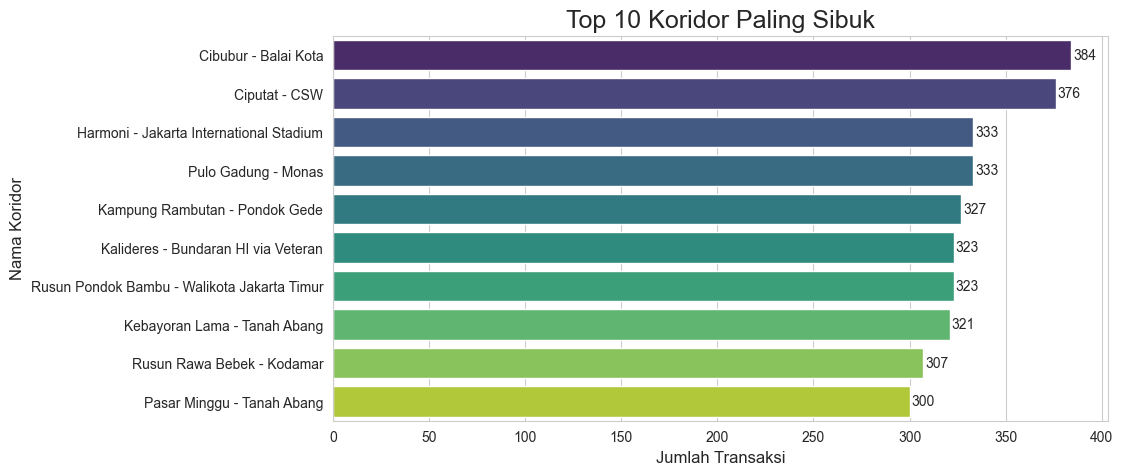

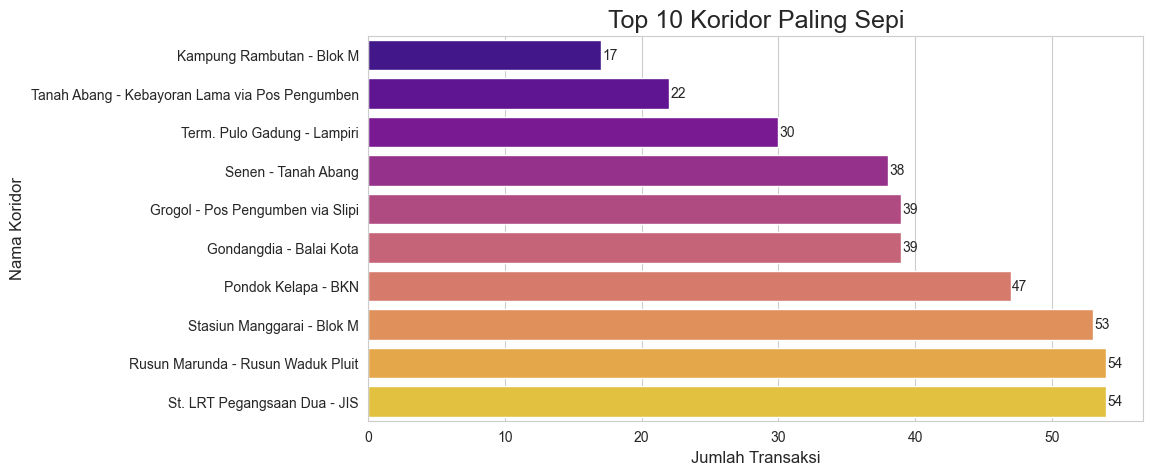

In [131]:
# Menghitung jumlah transaksi untuk setiap koridor menggunakan .value_counts()

corridor_traffic = clean_df['corridorName'].value_counts()

print("Total koridor yang tercatat:", len(corridor_traffic))
print("\nBerikut adalah 5 koridor dengan lalu lintas tertinggi:")
display(corridor_traffic.head())

###########################
# Ambil 10 data teratas
top_10_busy = corridor_traffic.head(10)

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Gunakan horizontal bar plot agar nama koridor yang panjang mudah dibaca
ax_busy = sns.barplot(
    x=top_10_busy.values,
    y=top_10_busy.index,
    palette="viridis"
)

ax_busy.set_title('Top 10 Koridor Paling Sibuk', fontsize=18)
ax_busy.set_xlabel('Jumlah Transaksi', fontsize=12)
ax_busy.set_ylabel('Nama Koridor', fontsize=12)

# Tambahkan label angka di ujung bar
for p in ax_busy.patches:
    width = p.get_width()
    ax_busy.text(width + 1, p.get_y() + p.get_height()/2,
                 f'{int(width):,}',
                 va='center')

plt.show()

#################
# Ambil 10 data terbawah dan urutkan menaik agar grafik lebih intuitif
bottom_10_quiet = corridor_traffic.tail(10).sort_values(ascending=True)

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

ax_quiet = sns.barplot(
    x=bottom_10_quiet.values,
    y=bottom_10_quiet.index,
    palette="plasma"
)

ax_quiet.set_title('Top 10 Koridor Paling Sepi', fontsize=18)
ax_quiet.set_xlabel('Jumlah Transaksi', fontsize=12)
ax_quiet.set_ylabel('Nama Koridor', fontsize=12)

# Tambahkan label angka di ujung bar
for p in ax_quiet.patches:
    width = p.get_width()
    ax_quiet.text(width + 0.1, p.get_y() + p.get_height()/2,
                 f'{int(width)}',
                 va='center')

plt.show()

### Insight:

Pada chart diatas, maka akan menjawab pertanyaan berikut:
* Koridor mana yang paling ramai dan paling sepi?
    - Dari chart diatas, kita mengambil 10 halte (stops) paling ramai dan sepi dari sudut pandang jumlah transaksi per halte. Dimana kita bisa menggambil sebuah informasi berdasarkan chart diatas. Dari 20 nama corridor semuanya berkaitan dengan titik lokasi yang berpotensi memliki aktivitas yang tinggi, tetapi jika diamati lebih lanjut memang ada kecenderungan bahwa aktivitas satu lokasi digerakan oleh mayoritas titik tertentu.
Sebagai contoh : Tanah abang disebutkan dalam koridor paling ramai dan paling sepi, yang bisa diambil kesimpulan sementara bahwa aktivitas tinggi di tanah abang bisa saja digerakkan oleh mayoritas orang-orang dari Kebayoran Lama bukan dari Senen. 

Dari contoh diatas, sebetulnya memerlukan evaluasi lebih lanjut dan mendalam terkait penyediaan jalur transportasi Transjakarta untuk masing-masing koridor

-------------

## Analisis Keramaian Halte vs. Jangkauan Koridor

Pada analisa ini akan dilakukan perbandingan data keramaian halte (jumlah tapIn dan tapOut pada satu stops) dengan jumlah koridor yang melewati stops tersebut. Asumsi awal adalah semakin ramai halte, maka jumlah koridor yang lewat juga akan semakin banyak.

Pada analisa ini, diharapkan akan menjawab pertanyaan berikut:
* Apakah keramaian halte juga akan meningkatkan jumlah koridor yang melewati halte tsb?
* Apakah terdapat halte dengan yang jumlah koridornya cukup banyak, tetapi tidak ramai? begitu pula sebaliknya?

--- Menghitung Total Lalu Lintas per Halte ---
Top 10 Halte dengan Lalu Lintas Tertinggi (Tap-In + Tap-Out):


,stopName,total_traffic
0,Penjaringan,493.0
1,BKN,461.0
2,BNN LRT,250.0
3,Tendean,246.0
4,Cibubur Junction,246.0
5,Rusun Kapuk Muara,237.0
6,Penggilingan,234.0
7,Kejaksaan Agung,233.0
8,Garuda Taman Mini,230.0
9,Pecenongan,216.0



--- Menghitung Jumlah Koridor Unik per Halte ---
Contoh jumlah koridor per halte:


,stopName,num_corridors
574,JPO Blok G,12
77,BNN LRT,11
71,BKN,10
199,Cawang UKI,10
3415,Term. Senen,10



--- Menggabungkan Data & Memvisualisasikan Hubungan ---
Tabel Analisis Final:


,stopName,total_traffic,num_corridors
0,Penjaringan,493.0,7
1,BKN,461.0,10
2,BNN LRT,250.0,11
3,Tendean,246.0,8
4,Cibubur Junction,246.0,4


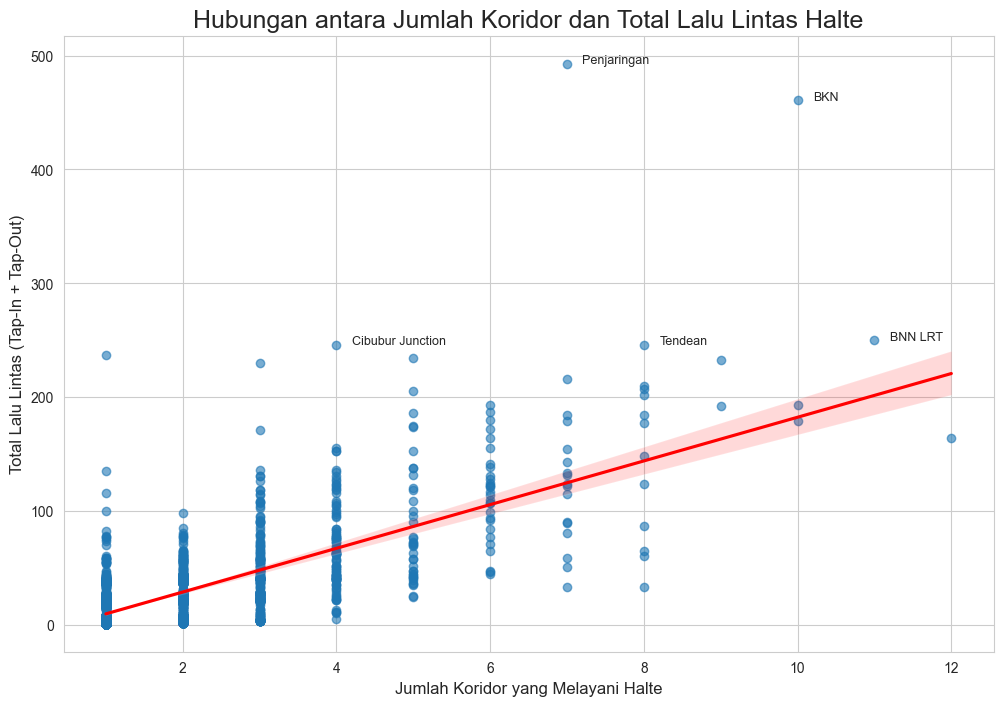

In [132]:
print("--- Menghitung Total Lalu Lintas per Halte ---")

# Hitung jumlah tap-in untuk setiap halte
tap_in_counts = clean_df['tapInStopsName'].value_counts()

# Hitung jumlah tap-out untuk setiap halte
tap_out_counts = clean_df['tapOutStopsName'].value_counts()

# Gabungkan kedua data series. .add() dengan fill_value=0 akan menangani halte
# yang mungkin hanya ada di salah satu list (misal, hanya sebagai titik tap-in).
total_traffic = tap_in_counts.add(tap_out_counts, fill_value=0).sort_values(ascending=False)

# Ubah menjadi DataFrame untuk kemudahan
total_traffic_df = total_traffic.reset_index()
total_traffic_df.columns = ['stopName', 'total_traffic']

print("Top 10 Halte dengan Lalu Lintas Tertinggi (Tap-In + Tap-Out):")
display(total_traffic_df.head(10))

#####################################

print("\n--- Menghitung Jumlah Koridor Unik per Halte ---")

# Siapkan data tap-in: (nama halte, nama koridor)
df_in = clean_df[['tapInStopsName', 'corridorName']].rename(columns={'tapInStopsName': 'stopName'})

# Siapkan data tap-out: (nama halte, nama koridor)
df_out = clean_df[['tapOutStopsName', 'corridorName']].rename(columns={'tapOutStopsName': 'stopName'})

# Gabungkan keduanya menjadi satu daftar panjang
all_stops_df = pd.concat([df_in, df_out]).dropna().drop_duplicates()

# Sekarang, kelompokkan berdasarkan nama halte dan hitung jumlah koridor uniknya
corridors_per_stop = all_stops_df.groupby('stopName')['corridorName'].nunique().reset_index()
corridors_per_stop.columns = ['stopName', 'num_corridors']

print("Contoh jumlah koridor per halte:")
display(corridors_per_stop.sort_values(by='num_corridors', ascending=False).head())

#########################################
print("\n--- Menggabungkan Data & Memvisualisasikan Hubungan ---")

# Gabungkan kedua DataFrame berdasarkan nama halte (stopName)
final_analysis_df = pd.merge(total_traffic_df, corridors_per_stop, on='stopName')

# Tampilkan tabel final
print("Tabel Analisis Final:")
display(final_analysis_df.head())

# Visualisasi dengan Scatter Plot untuk menguji hipotesis
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

ax = sns.regplot(
    data=final_analysis_df,
    x='num_corridors',
    y='total_traffic',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)

ax.set_title('Hubungan antara Jumlah Koridor dan Total Lalu Lintas Halte', fontsize=18)
ax.set_xlabel('Jumlah Koridor yang Melayani Halte', fontsize=12)
ax.set_ylabel('Total Lalu Lintas (Tap-In + Tap-Out)', fontsize=12)

# Beri label pada beberapa titik data teratas untuk insight
for i in range(5): # Beri label pada 5 halte teratas
    plt.text(final_analysis_df.num_corridors[i]+0.2, final_analysis_df.total_traffic[i], final_analysis_df.stopName[i], fontsize=9)

plt.show()


### Uji Statistik

#### Korelasi antara Jumlah Koridor dan Lalu Lintas Halte

In [133]:
print("--- Menjalankan Uji Korelasi Peringkat Spearman ---")

# Ambil dua kolom yang akan diuji
x = corridors_per_stop['num_corridors']
y = total_traffic_df['total_traffic']

# Lakukan uji korelasi Spearman
correlation_coefficient, p_value = stats.spearmanr(x, y)


print(f"\nHasil Uji Korelasi Spearman:")
print(f"Koefisien Korelasi (rho) = {correlation_coefficient:.4f}")
print(f"P-value = {p_value:.4f}")


# --- Interpretasi Hasil ---
print("\n--- Interpretasi ---")

# Interpretasi P-value
alpha = 0.05
if p_value < alpha:
    print(f"1. P-value ({p_value:.4f}) lebih kecil dari {alpha}, maka hasilnya SIGNIFIKAN secara statistik.")
    print("   Ini berarti kita menolak Hipotesis Nol. Hubungan yang kita lihat di grafik kemungkinan besar bukan karena kebetulan.")
else:
    print(f"1. P-value ({p_value:.4f}) lebih besar dari {alpha}, maka hasilnya TIDAK SIGNIFIKAN secara statistik.")
    print("   Ini berarti kita tidak punya cukup bukti untuk mengatakan ada hubungan nyata antara kedua variabel.")


# Interpretasi Koefisien Korelasi
if p_value < alpha: # Hanya interpretasi koefisien jika hasilnya signifikan
    if correlation_coefficient > 0.7:
        strength = "sangat kuat"
    elif correlation_coefficient > 0.4:
        strength = "cukup kuat (moderat)"
    elif correlation_coefficient > 0.1:
        strength = "lemah"
    else:
        strength = "sangat lemah"
    
    direction = "positif" if correlation_coefficient > 0 else "negatif"

    print(f"\n2. Koefisien korelasi sebesar {correlation_coefficient:.4f} menunjukkan adanya hubungan yang {strength} dan bersifat {direction}.")
    print("   Artinya, ada kecenderungan kuat bahwa halte yang dilayani oleh lebih banyak koridor juga memiliki lalu lintas yang lebih tinggi.")

--- Menjalankan Uji Korelasi Peringkat Spearman ---

Hasil Uji Korelasi Spearman:
Koefisien Korelasi (rho) = 0.0636
P-value = 0.0002

--- Interpretasi ---
1. P-value (0.0002) lebih kecil dari 0.05, maka hasilnya SIGNIFIKAN secara statistik.
   Ini berarti kita menolak Hipotesis Nol. Hubungan yang kita lihat di grafik kemungkinan besar bukan karena kebetulan.

2. Koefisien korelasi sebesar 0.0636 menunjukkan adanya hubungan yang sangat lemah dan bersifat positif.
   Artinya, ada kecenderungan kuat bahwa halte yang dilayani oleh lebih banyak koridor juga memiliki lalu lintas yang lebih tinggi.


### Insight:


Pada analisa ini, diharapkan akan menjawab pertanyaan berikut:
* Apakah keramaian halte juga akan meningkatkan jumlah koridor yang melewati halte tsb?
    - secara umum asumsi awal sesuai dengan pengujian yang dilakukan, terdapat korelasi positif antara keramaian halte (stops) dengan jumlah koridor yang melayani sebuah halte.

* Apakah terdapat halte dengan yang jumlah koridornya cukup banyak, tetapi tidak ramai? begitu pula sebaliknya?
    - jika diamati lebih lanjut, memang terdapat outlier pada chart yang ditampilkan diatas. Informasi ini, memerlukan tindak lanjut untuk dianalisa dengan beberapa kemungkinan:
        - Kuadran kiri atas, mengindikasi tingginya tingkat keramaian pada halte namun jumlah koridor yang lewat hanya sedikit. (adanya kemungkinan bahwa halte tersebut berada pada titik pusat kegiatan/perkantoran atau adanya integrasi dengan mode transportasi lain seperti KRL atau MRT).

        - Kuadran kanan bawah, mengindikasi rendahnya tingkat keramaian pada halte namun jumlah koridor yang lewat hanya sedikit. (adanya kemungkian bahwa halte tersebut berada bukan pada titik pusat kegiatan, tetapi dalam jalur antar titik pusat kegiatan saja. Sehingga halte ini hanya dilewati, tetapi tidak terjadi penambahan atau pengurangan penumpang di halte tsb)

Berikut daftar halte yang bisa dijadikan refensi:

In [134]:
print("--- Mempersiapkan Tabel Analisis Utama ---")

# 1. Hitung Total Lalu Lintas
tap_in_counts = clean_df['tapInStopsName'].value_counts()
tap_out_counts = clean_df['tapOutStopsName'].value_counts()
total_traffic = tap_in_counts.add(tap_out_counts, fill_value=0)
total_traffic_df = total_traffic.reset_index()
total_traffic_df.columns = ['stopName', 'total_traffic']

# 2. Hitung Jumlah Koridor Unik
df_in = clean_df[['tapInStopsName', 'corridorName']].rename(columns={'tapInStopsName': 'stopName'})
df_out = clean_df[['tapOutStopsName', 'corridorName']].rename(columns={'tapOutStopsName': 'stopName'})
all_stops_df = pd.concat([df_in, df_out]).dropna().drop_duplicates()
corridors_per_stop = all_stops_df.groupby('stopName')['corridorName'].nunique().reset_index()
corridors_per_stop.columns = ['stopName', 'num_corridors']

# 3. Gabungkan kedua data
final_analysis_df = pd.merge(total_traffic_df, corridors_per_stop, on='stopName')

print("✅ Tabel analisis utama berhasil dibuat.")

#####################

print("--- Analisis Halte Superstar ---")

# Buat salinan agar tidak mengubah DataFrame asli
superstar_df = final_analysis_df.copy()

# Buat metrik efisiensi: lalu lintas dibagi jumlah koridor
superstar_df['lalu_lintas_per_koridor'] = superstar_df['total_traffic'] / superstar_df['num_corridors']

# Urutkan berdasarkan metrik efisiensi ini, lalu berdasarkan total lalu lintas
superstar_df_sorted = superstar_df.sort_values(by=['lalu_lintas_per_koridor', 'total_traffic'], ascending=[False, False])


print("Berikut adalah daftar Top 10 Halte 'Superstar':")
# Tampilkan kolom-kolom yang relevan
display(superstar_df_sorted[['stopName', 'total_traffic', 'num_corridors', 'lalu_lintas_per_koridor']].head(10))

########################
print("\n--- Analisis Halte Simpang ---")

# Tentukan ambang batas
# Ambang batas 'banyak koridor' adalah di atas rata-rata
high_corridor_threshold = final_analysis_df['num_corridors'].mean()
# Ambang batas 'sedikit lalu lintas' adalah di bawah rata-rata
low_traffic_threshold = final_analysis_df['total_traffic'].mean()

# Saring DataFrame berdasarkan kedua kondisi
simpang_df = final_analysis_df[
    (final_analysis_df['num_corridors'] > high_corridor_threshold) &
    (final_analysis_df['total_traffic'] < low_traffic_threshold)
]

# Urutkan berdasarkan jumlah koridor (paling banyak di atas), lalu berdasarkan lalu lintas
simpang_df_sorted = simpang_df.sort_values(by=['num_corridors', 'total_traffic'], ascending=[False, False])

print(f"Mencari halte dengan > {high_corridor_threshold:.1f} koridor dan < {low_traffic_threshold:,.0f} total lalu lintas.")
print("\nBerikut adalah daftar Top 10 Halte 'Simpang':")
display(simpang_df_sorted[['stopName', 'total_traffic', 'num_corridors']].head(10))

--- Mempersiapkan Tabel Analisis Utama ---
✅ Tabel analisis utama berhasil dibuat.
--- Analisis Halte Superstar ---
Berikut adalah daftar Top 10 Halte 'Superstar':


,stopName,total_traffic,num_corridors,lalu_lintas_per_koridor
2149,Rusun Kapuk Muara,237.0,1,237.000000
2159,Rusun Penjaringan,135.0,1,135.000000
132,Bintaro Xchange,116.0,1,116.000000
1118,Jln. Tebet Timur Dalam VIII J,100.0,1,100.000000
2160,Rusun Pesakih,82.0,1,82.000000
2142,Rusun Cakung Barat Albo,78.0,1,78.000000
1755,Pertamina Kalideres Daan Mogot,77.0,1,77.000000
2170,Rusun Tipar Cakung,77.0,1,77.000000
343,Garuda Taman Mini,230.0,3,76.666667
2154,Rusun Komarudin,75.0,1,75.000000



--- Analisis Halte Simpang ---
Mencari halte dengan > 1.5 koridor dan < 20 total lalu lintas.

Berikut adalah daftar Top 10 Halte 'Simpang':


,stopName,total_traffic,num_corridors
2055,RS Pusat Pertamina 2,13.0,4
111,Baywalk 2,11.0,4
2034,RS Harapan Kita Arah Selatan,11.0,4
3308,Taman BMW,10.0,4
1832,Pluit Sakti,5.0,4
270,Duren Sawit,20.0,3
1417,Madya Kebantenan,20.0,3
2025,RS Duren Sawit,20.0,3
3384,Tegal Parang 2,20.0,3
3385,Tegal Parang Arah Barat,20.0,3


------------

# Kesimpulan dan Rekomendasi


## Kesimpulan:

Dari analisa yang sudah dilakukan, kita bisa menarik beberapa informasi penting terkait pelayanan yang diberikan:
- Total pengguna layanan adalah 1977 pengguna dengan jumlah transaksi pada bulan April 2023 adalah 35.447
- Jumlah pengguna layanan mayoritas adalah perempuan (53,2%) dan laki--laki (46,8%). Dimana jika melihat lebih spesifik dalam kelompok jam maupun hari, proporsi bisa saja berubah-ubah tetapi selalu ada kecenderungan persentase perempuan lebih tinggi dari laki-laki
- Layanan secara keseluruhan terlihat sibuk pada hari kerja(senin s.d jumat), dimana kontribusi terbesarnya adalah pada jam berangkat dan pulang kerja.
- Adanya kecenderungan peningkatan jumlah transaksi dari hari kamis ke hari jumat pada layanan secara keseluruhan
- Adanya kecenderungan terjadi penurunan jumlah pengguna 70-80% pada saat weekend (jumat-> sabtu) dimana ini terjadi konsisten pada 3 jenis layanan yang diberikan
- Proporsi pengguna layanan Transjakarta adalah yang paling tinggi (58,7%) diikuti dengan jaklingko (36,6%) dan terakhir Royaltrans (4,6%)
- Masing-masing kelompok layanan mempunyai durasi perjalanan yang berbeda dikarenakan karakteristik pada masing-masing layanan
- Keramaian sebuah halte, bisa disebabkan oleh tingginya jumlah pengguna dari salah satu koridor bukan karena banyak koridor

## Rekomendasi:

Peningkatan Kualitas layanan dari sisi Durasi Perjalanan:
- Peningkatan Kualitas layanan dari sisi ketersedia Armada melalui penjadwalan (potensi efisiensi biaya operasional)
    - Meningkatkan jumlah armada pada jam Berangkat dan Pulang Kantor (weekdays)
    - Meningkatkan jumlah armada pada jam kerja dan Pulang Kantor (weekend)
    Rekomendasi ini diberikan agar kebutuhan pengguna segera dipenehi, mengurangi waktu tunggu dan durasi perjalanan

Peningkatan Kualitas layanan dari Kondisi dan Infrastruktur Halte (potensi meningkatkan kepuasan dan keselamatan pelanggan)
- Melakukan pemeriksaan pada kondisi halte secara berkala berdasarkan tingkat keramaian halte
    - Dengan tingginya aktivitas pada suatu halte akan meningkatkan kemungkinan terjadinya kerusakan pada halte, sehingga perlu diperlukan pemeriksaan lebih pada halte-halte yang aktivitasnya tinggi. Kerusakan pada halte dapat meningkatkan kemungkinan keselamatan dan kenyamanan pengguna. Keamanan ini menjadi faktor penting juga untuk mempertahankan image layanan, apa jadinya ketika layanan sudah membentuk image cepat dan aman bagi wanita dan anak dalam perjalanan, tetapi ada faktor bahaya ketika memasuki halte
    - Memprioritaskan program perbaikan dan peningkatan kapasitas (perluasan, penambahan gate)

Peningkatan Kualitas layanan dari sisi Keamanan dalam Bis (potensi meningkatkan image layanan)
- Perluasan area khusus wanita dan anak terutama dalam layanan Transjakarta (untuk mengurangi potensi terjadi pelecehan seksual)
    - karena jumlah pengguna layanan Transjakarta > 50% adalah wanita, maka perlu penyesuian agar pengguna layanan wanita merasa lebih aman. Kondisi saat ini hanya sekitar 25-30% dari area bus transjakarta yang dijadikan area khusus wanita. (Meningkatkan image sebagai layanan yang aman bagi wanita dan anak)

